# Business Understanding

**Latar Belakang**

"Green Taxi" atau "Boro Taxis" atau selanjutnya kita akan sebut taksi hijau, merupakan bagian dari inisiatif yang dikenal sebagai "Borough Taxi Program" yang dimulai pada 2013 di kota New York. Taksi hijau diatur oleh NYC Taxi and Limousine Commission (TLC). Mereka beroperasi dengan aturan yang mirip dengan taksi kuning, tetapi dengan izin khusus untuk melayani wilayah-wilayah tertentu di luar Manhattan.

Analisis perjalanan menggunakan GPS oleh Komisi Taksi dan Limusin menemukan bahwa 95% penjemputan taksi kuning terjadi di Manhattan di bawah 96th Street dan di bandara JFK dan LaGuardia. Oleh karena itu adanya taksi hijau ini diharapkan mampu memenuhi permintaan akan taksi yang melebihi pasokan selama berjam-jam setiap hari diluar daerah padat tersebut, terutama di wilayah Brooklyn, Queens, The Bronx, dan Staten Island. Pada bulan Desember 2011, Gubernur Andrew Cuomo menandatangani undang-undang negara bagian yang mengesahkan Rencana Taksi Lima Wilayah yang mencakup 18.000 izin taksi boro baru dan penjualan 2.000 medali kuning baru, yang semuanya dapat diakses oleh kursi roda. Meskipun undang-undang tersebut akan membuat panggilan taksi livery di jalan menjadi legal, hal ini tidak disambut baik oleh beberapa pengemudi taksi livery dan politisi karena kekhawatiran bahwa biayanya akan terlalu mahal seperti yang terlihat pada medali taksi kuning yang dijual melalui lelang dengan rata-rata \$700.000 per medali. Komisi Taksi dan Limusin mengklarifikasi bahwa izin taksi boro hanya menelan biaya \$1.500 dan berlaku selama tiga tahun. [disini](https://en.wikipedia.org/wiki/Boro_taxi)

Namun solusi dengan program taksi hijau tak semulus yang dikira. Fakta yang ada menunjukkan kemrosotan performa taksi hijau dibanding dengan taksi kuning. Berdasarkan laporan bulanan NYC TLC [disini]((https://www.nyc.gov/site/tlc/about/aggregated-reports.page)). Grafik yang ada menunjukkan sejak 2020 taksi hjau mengalami penurunan jumalh trip, jumlah pengemudi dan jumlah kendaraan aktif hal ini berbanding terbalik dengan taksi kuning yang sempat drop di tahun 2020 dan terus naik di tahun-tahun berikutnya

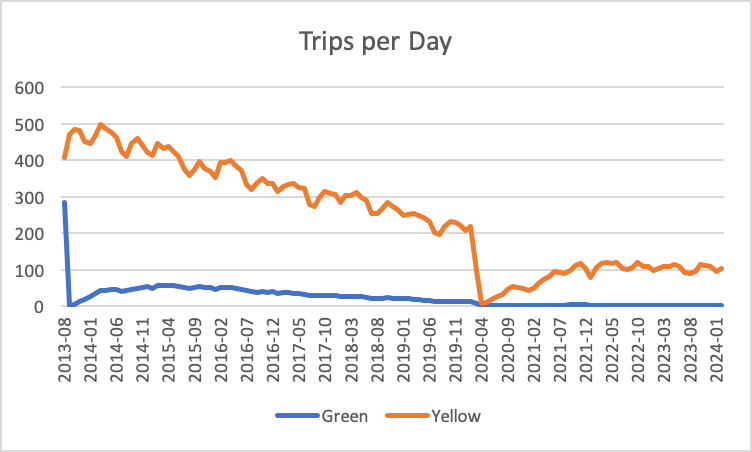



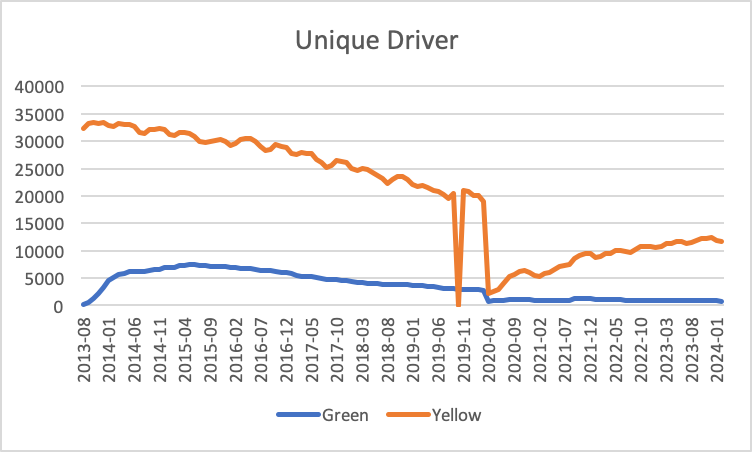

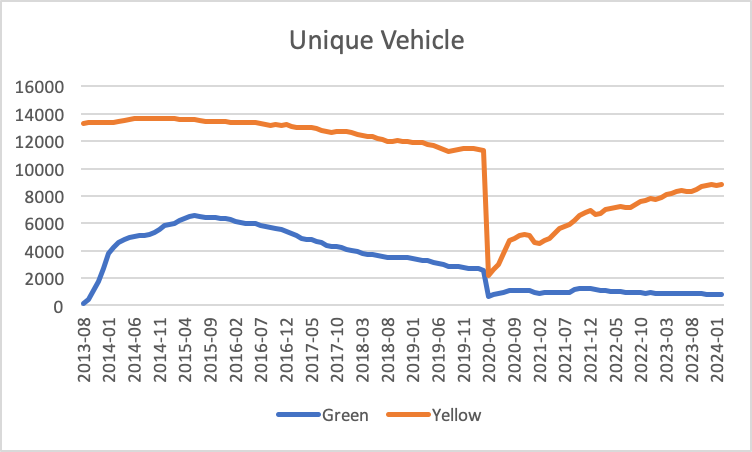

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Pernyataan Masalah**

Telah diuraikan pada latar belakang bahwa taksi hijau terus mengalami penurunan transaksi perjalanan bahkan sejak tahun 2015. Jika diawal kemunculan taksi hijau diharapkan menjadi solusi kendaraan untuk wilayah yang tidak terjangkau oleh taksi kuning dengan biaya lisensi yang jauh lebih murah dibanding taksi kuning. Apakah taksi hijau masih terus bisa menjadi harapan kendaraan yang baik untuk jangkauan wilayah yang tak terjangkau oleh taksi kuning?

**Batasan Masalah**

Untuk menjawab permasalahan diatas kami menggunakan data trip record TLC NYC periode Januari 2023 [disini](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

**Tujuan**

Analisa ini diharapkan mampu menjawab pernyataan masalah diatas serta menjadi acuan NYC Taxi and Limousine Commission (TLC) untuk mempertimbangkan ulang adanya taksi hijau.


# Data Analysis

Analisa ini terbagi menjadi 2 file worksheet , yang pertama adalah Data Preparation untuk medapatkan data bersih yang siap pakai dan pada worksheet ini kami khususkan untuk analisa data.


**Analisa data akan dilakukan dengan melihat aspek-aspek berikut**

1. Semua pendapatan yang diterima oleh pengemudi selama Januari 2023

2. Mengidentifikasi biaya opersional dan mendapatkan Pendapatan bersih yang diterima oleh pengemudi setelah diketahui biaya operasional

3. Kepuasan penumpang terhadap pengemudi ditinjau dari tip yang diberikan


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%cd /content/drive/My Drive/Capstone Modul 2/

/content/drive/My Drive/Capstone Modul 2


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Import data csv
nyc = pd.read_csv("nyc_preparation.csv")

In [ ]:
nyc.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,payment_type,trip_type,congestion_surcharge,total_amount_1,PU_Borough,PU_Zone,PU_Service_Zone,DO_Borough,DO_Zone,DO_Service_Zone
0,VeriFone Inc,2023-01-01 00:26:10,2023-01-01 00:37:11,11.02,N,Standard rate,166,143,1.0,2.58,...,Credit card,Street-hail,2.75,26.93,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,VeriFone Inc,2023-01-01 00:51:03,2023-01-01 00:57:49,6.77,N,Standard rate,24,43,1.0,1.81,...,Credit card,Street-hail,0.00,15.84,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,VeriFone Inc,2023-01-01 00:35:12,2023-01-01 00:41:32,6.33,N,Standard rate,223,179,1.0,0.00,...,Credit card,Street-hail,0.00,11.64,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,"Creative Mobile Technologies, LLC",2023-01-01 00:13:14,2023-01-01 00:19:03,5.82,N,Standard rate,41,238,1.0,1.30,...,Credit card,Street-hail,0.00,10.20,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,"Creative Mobile Technologies, LLC",2023-01-01 00:33:04,2023-01-01 00:39:02,5.97,N,Standard rate,41,74,1.0,1.10,...,Credit card,Street-hail,0.00,8.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone


In [ ]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63833 entries, 0 to 63832
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               63833 non-null  object 
 1   lpep_pickup_datetime   63833 non-null  object 
 2   lpep_dropoff_datetime  63833 non-null  object 
 3   trip_duration          63833 non-null  float64
 4   store_and_fwd_flag     63833 non-null  object 
 5   RatecodeID             63833 non-null  object 
 6   PULocationID           63833 non-null  int64  
 7   DOLocationID           63833 non-null  int64  
 8   passenger_count        63833 non-null  float64
 9   trip_distance          63833 non-null  float64
 10  fare_amount            63833 non-null  float64
 11  extra                  63833 non-null  float64
 12  mta_tax                63833 non-null  float64
 13  tip_amount             63833 non-null  float64
 14  tolls_amount           63833 non-null  float64
 15  im

## 1. Total Semua Pendapatan Pengemudi Januari 2023

Berikut atribut yang menunjukkan pendapatan yang diterima oleh pengemudi dalam satuan dollar

- fare_amount
- extra
- mta_tax
- tip_amount
- tolls_amount
- improvement_surcharge
- total_amount
- congestin_surcharge
- total_amount_1


**Analisis**
1. Melihat deskriptif pada transkasi atribut pembayaran dalam dollar ($)
2. Pendapatan dan transaksi terbanyak berdasarkan `RatecodeID`
3. Pendapatan dan transaksi terbanyak berdasarkan `trip_type`
4. Pendapatan dan transaksi terbanyak berdasarkan `payment_type`
5. Pendapatan dan transaksi terbanyak berdasarkan `Pickup zone`
6. Pendapatan dan transaksi terbanyak berdasarkan `Drop off zone`
7. Melihat pendapatan per minggu
8. Melihat pendapatan per hari
9. Pada pendapatan per hari, hari yang paling banyak di zona pickup mana dan zona dropp off kemana

### 1.1. Deskriptif pendapatan tiap transaksi dalam satuan dollar ($)

In [ ]:
nyc[['total_amount_1', 'total_amount', 'fare_amount', 'extra', 'mta_tax',\
    'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge']].describe()

,total_amount_1,total_amount,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge
count,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000
mean,21.987717,21.260077,16.117201,0.885764,0.629945,2.043188,0.144179,0.955087,0.727641
std,15.418889,15.061282,13.234883,1.289895,0.362241,2.998883,1.012765,0.173517,1.213085
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.800000,12.600000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,0.000000
50%,18.100000,17.500000,12.800000,0.000000,0.500000,1.410000,0.000000,1.000000,0.000000
75%,26.900000,25.500000,19.100000,1.000000,0.500000,3.220000,0.000000,1.000000,2.750000
max,491.000000,491.000000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,2.750000


>- Kolom total_amount_1 adalah kolom total_amount ditambahkan kolom congestion_surcharge yang artinya total semua pembayaran termasuk biaya macet pada setiap transaksi. Atribut ini mempunyai nilai rentang antara \$0 sampai \$491 , rata-rata biaya yang diterima pengemudi sebesar \$21.98 pada setiap transaksinya dengan standar penyimpangan data terhadap nilai rata-ratanya sebesar \$15.41. Kemudian 25% dari data transaksi, rentang pembayaran sebesar \$0 sampai \$12.8 dan rentang pembayaran dari 75% data transaksi adalah sebesar \$0 sampai \$26.9. Nilai tengah dari kolom total_amount_1 sebesar \$18.1.

>- Kolom total_amount adalah total dari atribut pembayaran dalam setiap transaksi kecuali kolom congestion_surcharge. Atribut ini mempunyai nilai rentang antara \$0 sampai \$491. Rata-rata biaya yang diterima pengemudi sebesar \$21.26, rata-rata ini belum menghitung biaya macet pada setiap transaksinya. Standar penyimpangan data terhadap nilai rata-ratanya sebesar \$15.06. Kemudian 25% dari data transaksi, rentang pembayaran sebesar \$0 sampai \$12.6 dan rentang pembayaran antara 0 sampai 75% data transaksi adalah sebesar \$25.5. Nilai tengah dari kolom total_amount sebesar \$17.5.

>- Kolom fare_amount adalah atribut total tarif berdasarkan jarak tempuh perjalanan diluar biaya lain-lain. Atribut ini mempunyai nilai rentang antara \$0 sampai \$490. Rata-rata biaya sebesar \$16.11. Standar penyimpangan data terhadap nilai rata-ratanya sebesar \$13.23. Kemudian 25% dari data transaksi, rentang pembayaran sebesar \$0 sampai \$9.3 dan rentang pembayaran antara 0 sampai 75% data transaksi adalah sebesar \$19.1. Nilai tengah dari kolom total_amount sebesar \$12.8.

>- Kolom extra adalah atribut tarif tambahan lain-lain. Atribut ini mempunyai nilai rentang antara \$0 sampai \$12.5. Rata-rata biaya sebesar \$0.88. Standar penyimpangan data terhadap nilai rata-ratanya sebesar \$1.28. Kemudian 50% dari data transaksi tidak ada biaya tambahan,dan rentang data 0 sampai 75% data transaksi adalah sebesar \$1.

>- Kolom mta_tax adalah atribut dari pajak dari tarif perjalanan. Atribut ini mempunyai nilai rentang antara \$0 sampai \$2.75. Rata-rata pajak sebesar \$0.62. Standar penyimpangan data terhadap nilai rata-ratanya sebesar \$0.36. Kemudian 75% dari data transaksi mendapatkan pajak sebesar \$0.5.

>- Kolom tip_amount adalah atribut untuk melihat besaran tips yang diberikan penumpang kepada pengemudi. Atribut ini mempunyai nilai rentang antara \$0 sampai \$222.22. Rata-rata pajak sebesar \$2.04. Standar penyimpangan data terhadap nilai rata-ratanya sebesar \$2.99. Kemudian 50% dari data transaksi memberikan tips sebesar \$0 sampai \$1.4,dan rentang data 0 sampai 75% data transaksi adalah sebesar \$3.22.

>- Kolom tolls_amount adalah atribut biaya toll selama perjalanan. Atribut ini mempunyai nilai rentang antara \$0 sampai \$36.05. Rata-rata pajak sebesar \$0.14. Standar penyimpangan data terhadap nilai rata-ratanya sebesar \$1.01. Kemudian 75% dari data transaksi perjalanan tidak menggunakan toll.

>- Kolom improvement_surcharge adalah atribut biaya layanan. Atribut ini mempunyai nilai rentang antara \$0 sampai \$1. Rata-rata pajak sebesar \$0.95. Standar penyimpangan data terhadap nilai rata-ratanya sebesar \$0.17. Kemudian 75% dari data transaksi perjalanan mendapatkan biaya layanan sebesar $1.

>- Kolom congestion_surcharge adalah atribut biaya tambahan jika mengalami macet. Atribut ini mempunyai nilai rentang antara \$0 sampai \$2.75. Rata-rata pajak sebesar \$0.72. Standar penyimpangan data terhadap nilai rata-ratanya sebesar \$1.2. Kemudian 50% dari data transaksi tidak ada biaya tambahan,dan rentang data 0 sampai 75% data transaksi adalah sebesar \$2.75.

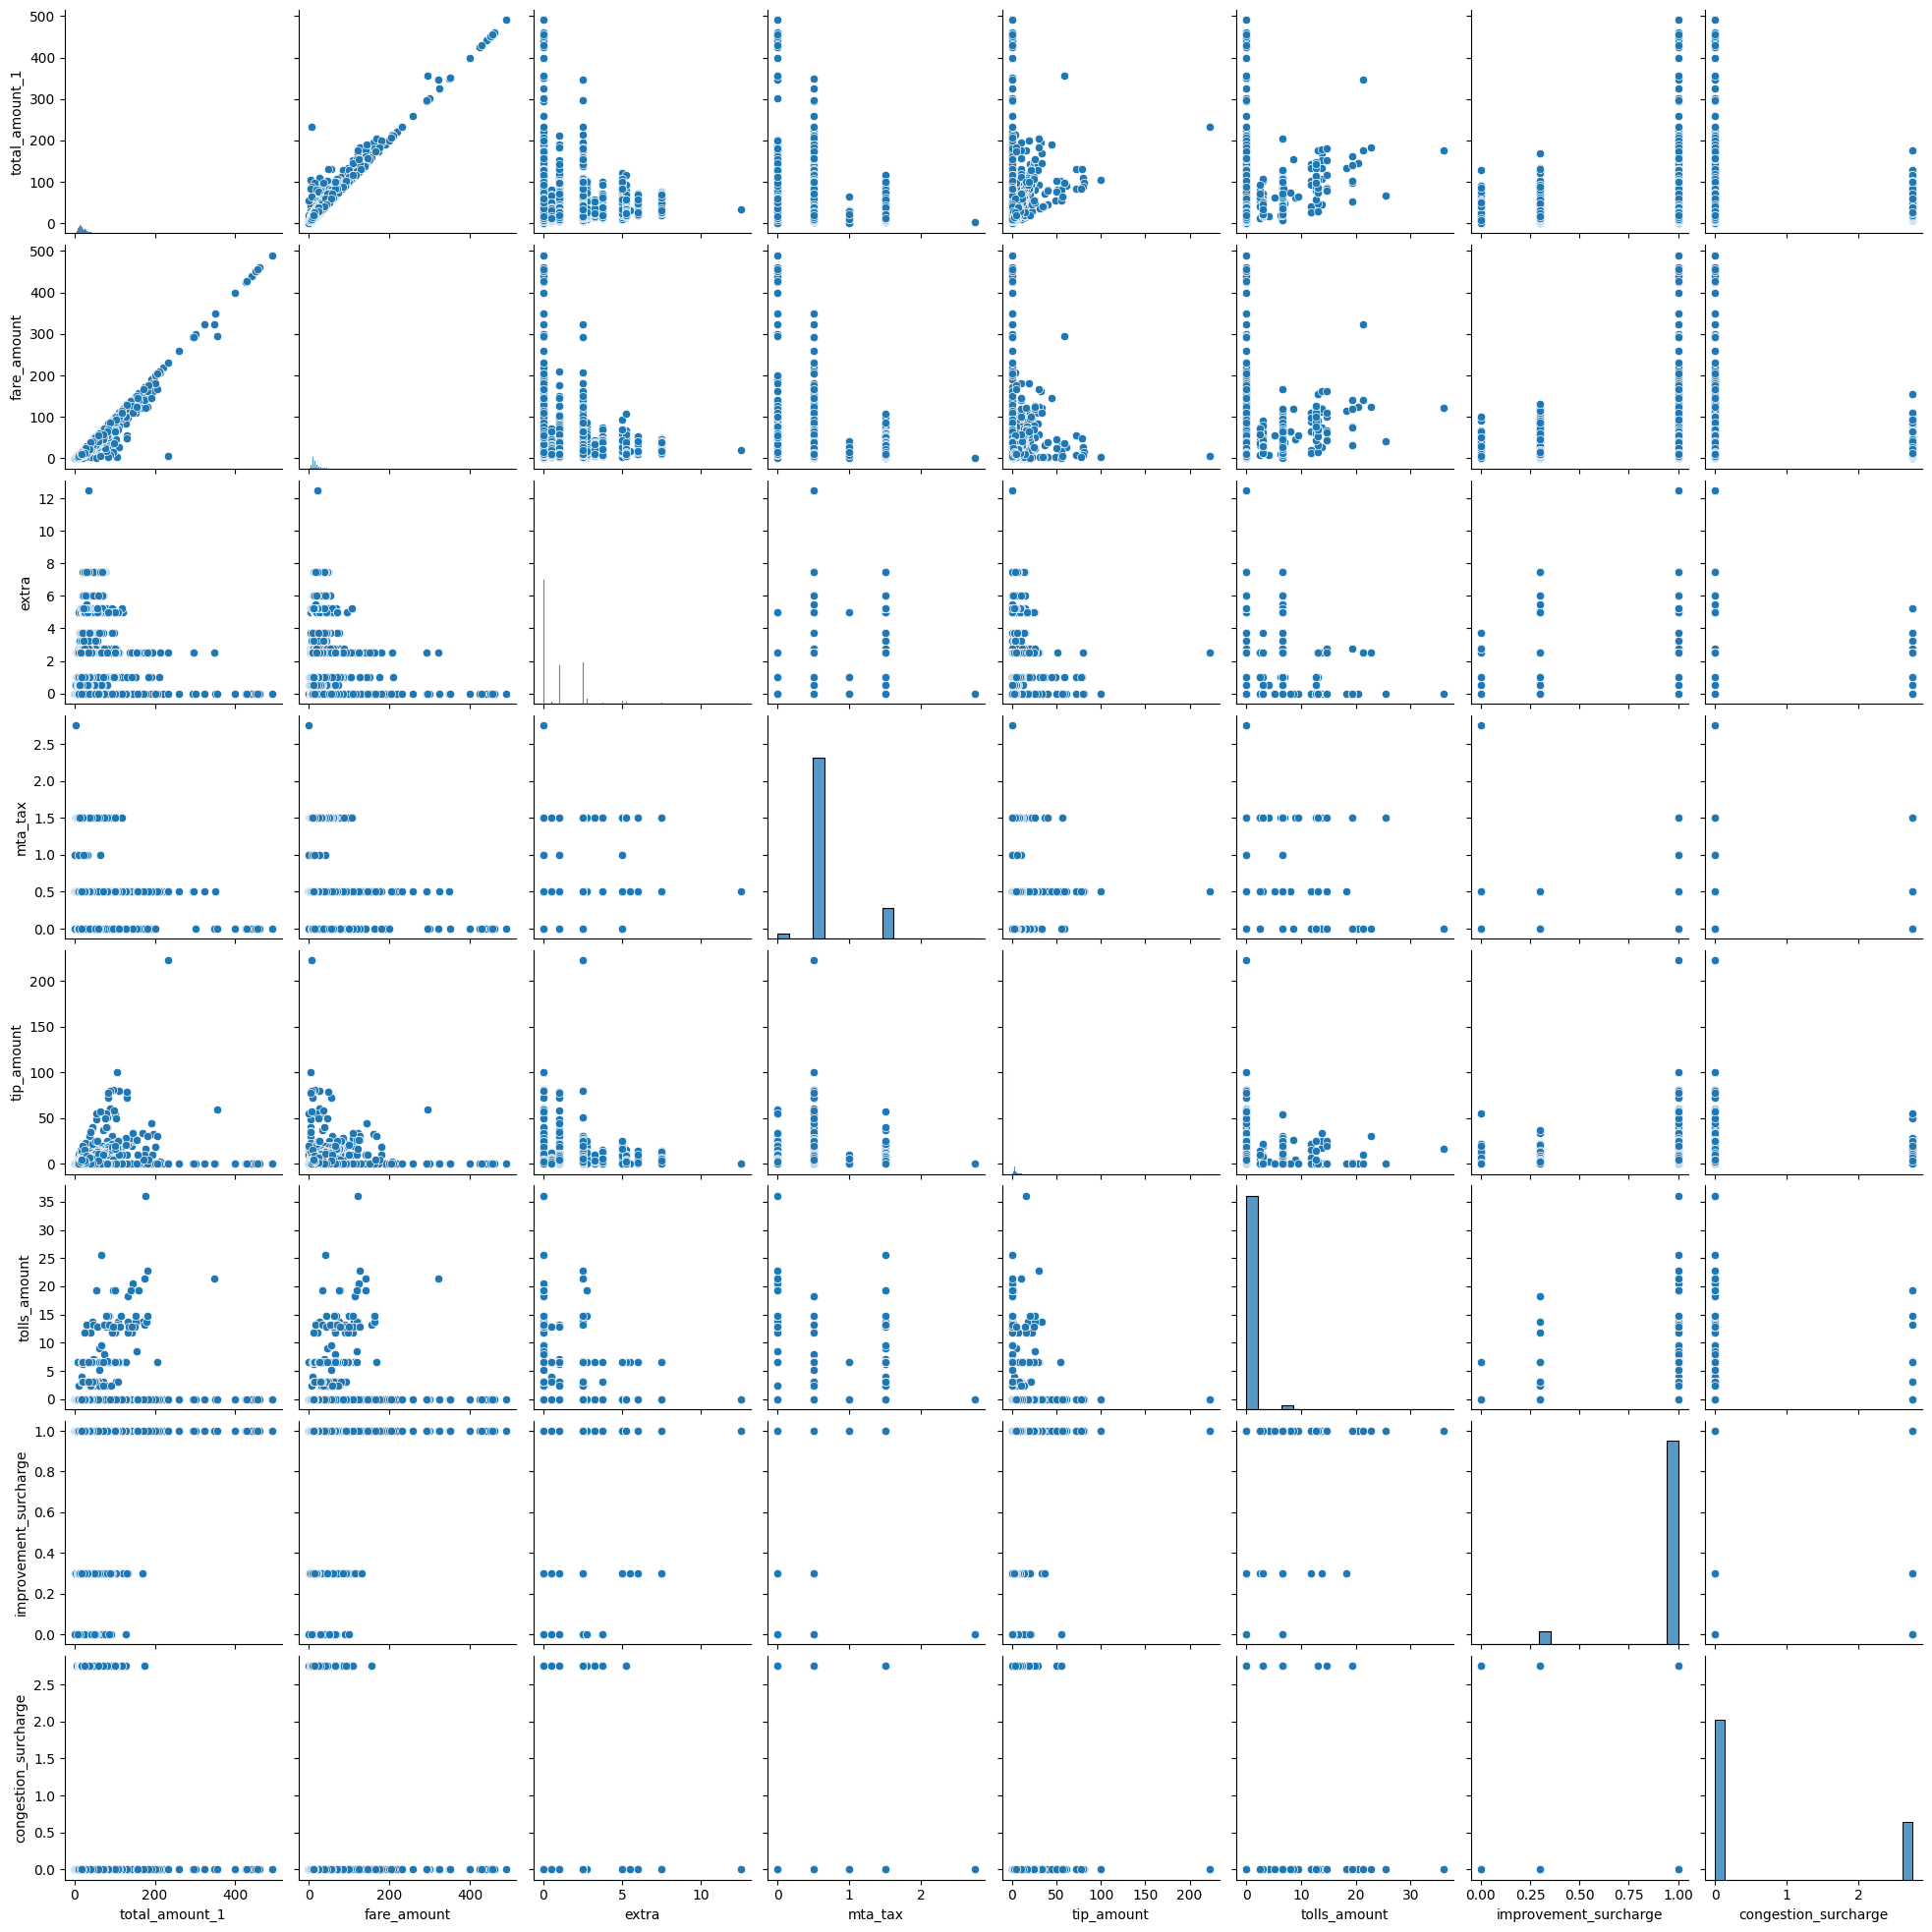

In [ ]:
# pairplot antar kolom pembayaran
sns.pairplot(nyc[['total_amount_1', 'fare_amount', 'extra', 'mta_tax',
    'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge']])

Pada pairplot menunjukkan
1. Kolom yang mempunyai hubungan positif adalah fare amount dan total amount.
2. Pada antar kolom yang lain pola data kurang terlihat.
3. Ada beberapa antar kolom yang memiliki data pencilan.

Kolom total_amount_1 merupakan penjumlahan dari kolom total_amount ditambah congestion_surcharge. Untuk analisa selanjutnya kami akan gunakan kolom total_amount_1 sebagai biaya yang diterima pengemudi

In [ ]:
# Korelasi antar kolom pembayaran
korelasi = nyc[['total_amount_1', 'fare_amount', 'extra', 'mta_tax',
    'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge']].corr()
korelasi

,total_amount_1,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge
total_amount_1,1.000000,0.955778,0.130896,-0.037396,0.491870,0.368752,0.033298,0.330710
fare_amount,0.955778,1.000000,0.016611,-0.032394,0.275960,0.314304,0.022753,0.148388
extra,0.130896,0.016611,1.000000,0.140619,0.127575,0.086910,0.059443,0.089005
mta_tax,-0.037396,-0.032394,0.140619,1.000000,-0.055471,0.016908,0.125316,0.007474
tip_amount,0.491870,0.275960,0.127575,-0.055471,1.000000,0.160866,0.000957,0.265606
tolls_amount,0.368752,0.314304,0.086910,0.016908,0.160866,1.000000,0.009880,-0.036332
improvement_surcharge,0.033298,0.022753,0.059443,0.125316,0.000957,0.009880,1.000000,-0.014804
congestion_surcharge,0.330710,0.148388,0.089005,0.007474,0.265606,-0.036332,-0.014804,1.000000


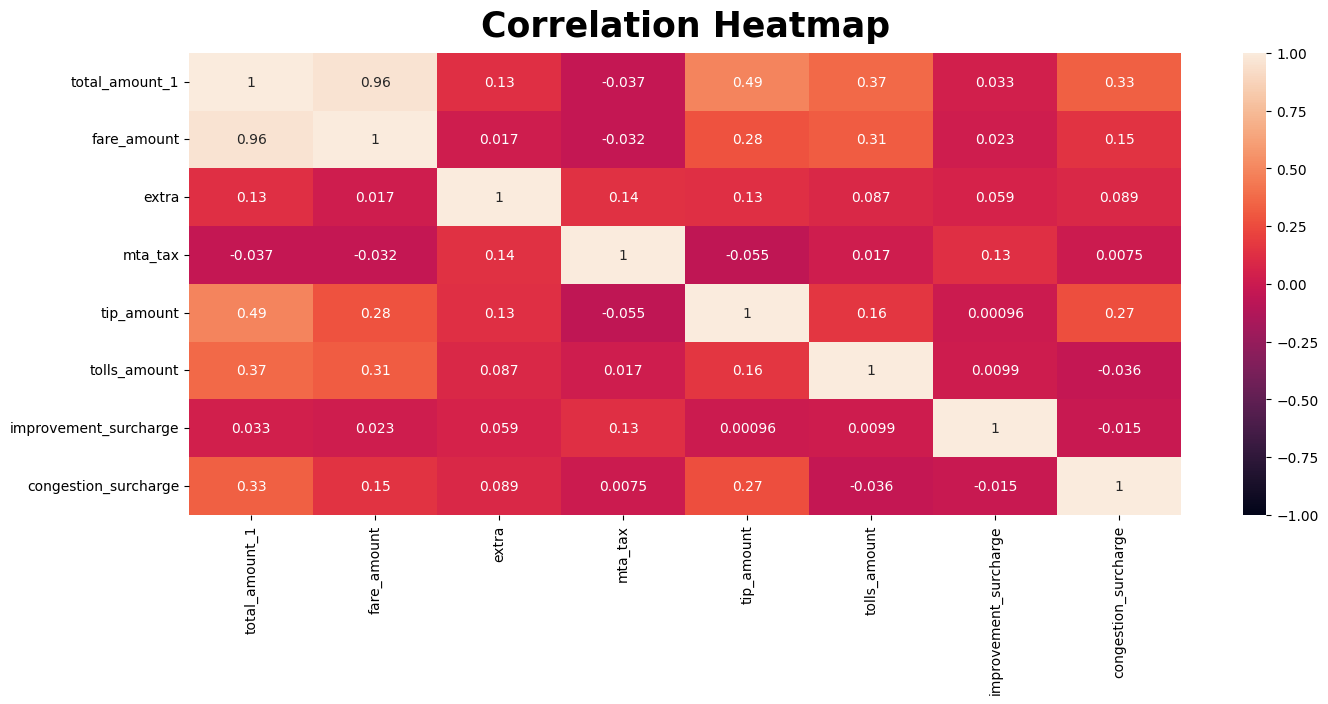

In [ ]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(korelasi, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':25, 'fontweight':'bold'}, pad=12)
plt.show()

Jika dilakukan cek korelasi
1. Kolom yang mempunyai korelasi tinggi dengan hubungan positif adalah biaya tarif dan total biaya sebesar 0.96
2. Pada kolom tip dengan total biaya terdapat korelasi sebesar 0.49
3. Kolom pajak mempunyai korelasi dengan kolom manapun.

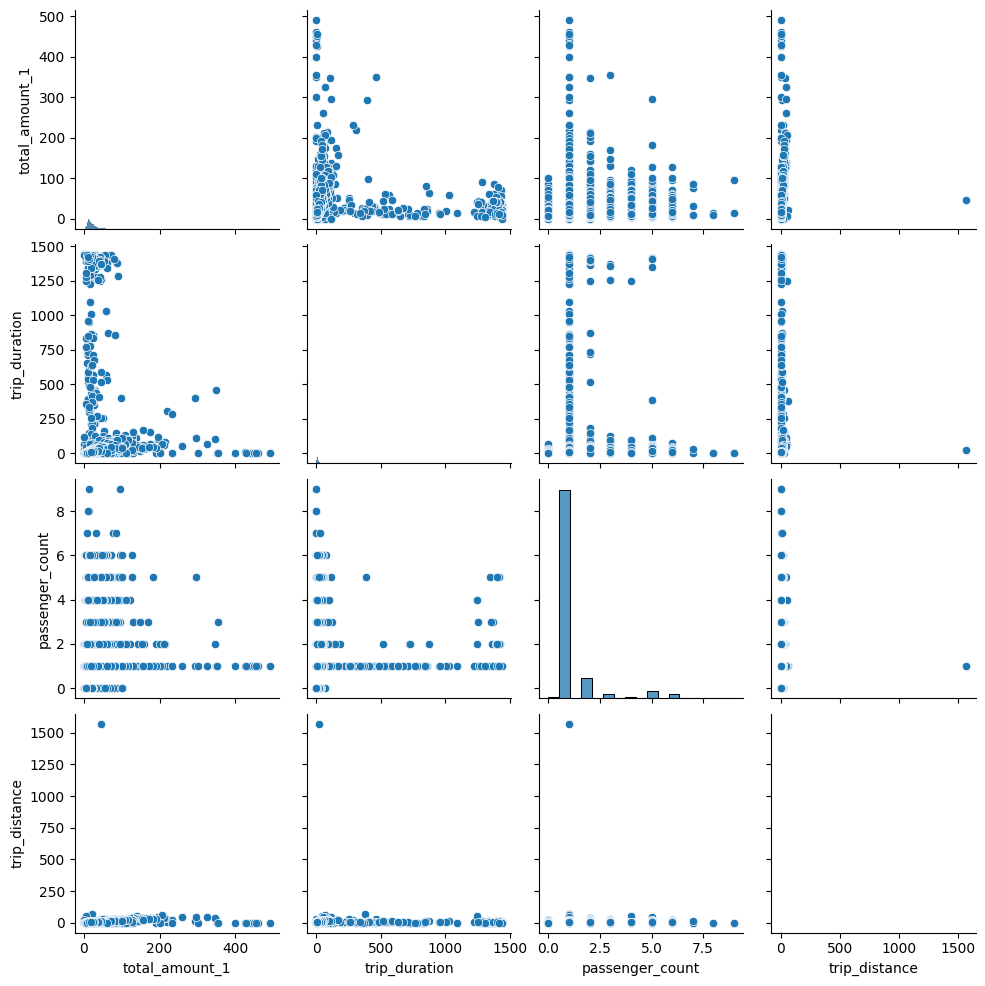

In [ ]:
# pairplot antar kolom numerik
sns.pairplot(nyc[['total_amount_1','trip_duration','passenger_count', 'trip_distance']])
plt.show()

In [ ]:
# Korelasi antar kolom numerik
korelasi1 = nyc[['total_amount_1','trip_duration','passenger_count', 'trip_distance']].corr()
korelasi1

,total_amount_1,trip_duration,passenger_count,trip_distance
total_amount_1,1.000000,0.104425,0.021225,0.305836
trip_duration,0.104425,1.000000,-0.009010,0.042427
passenger_count,0.021225,-0.009010,1.000000,0.007160
trip_distance,0.305836,0.042427,0.007160,1.000000


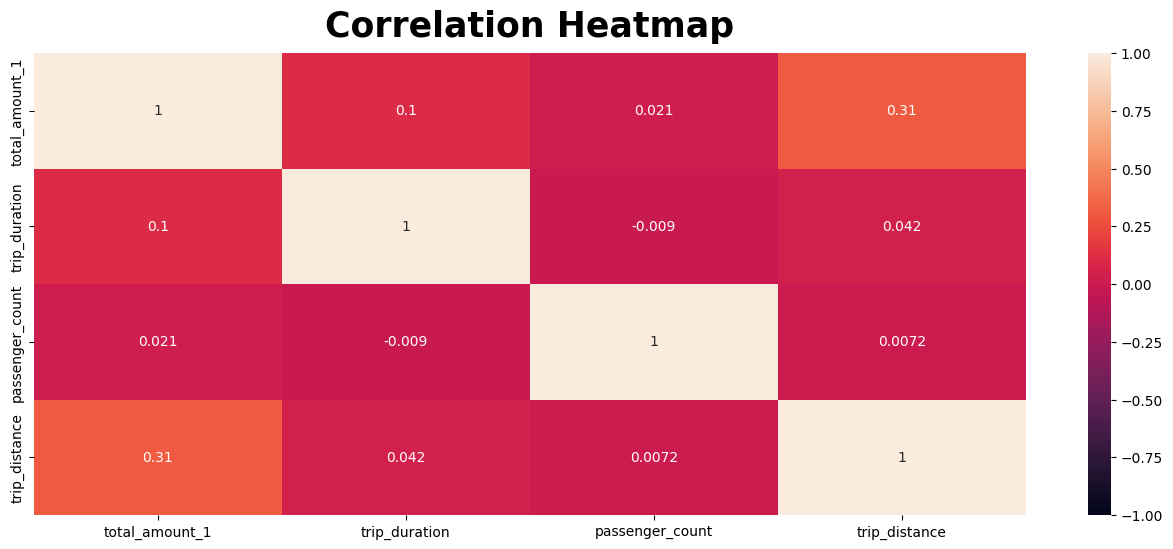

In [ ]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(korelasi1, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':25, 'fontweight':'bold'}, pad=12)
plt.show()

In [ ]:
nyc['trip_distance'].max()

1571.97

In [ ]:
nycmax = nyc['trip_distance']

In [ ]:
nycmax.sort_values(ascending=False).head()

33340    1571.97
7307       66.18
42973      57.09
48726      53.72
30471      48.70
Name: trip_distance, dtype: float64

In [ ]:
nyc.loc[nyc['trip_distance'] == 1571.97]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,payment_type,trip_type,congestion_surcharge,total_amount_1,PU_Borough,PU_Zone,PU_Service_Zone,DO_Borough,DO_Zone,DO_Service_Zone
33340,VeriFone Inc,2023-01-17 18:40:38,2023-01-17 19:04:45,24.12,N,Negotiated fare,82,236,1.0,1571.97,...,Credit card,Street-hail,2.75,46.06,Queens,Elmhurst,Boro Zone,Manhattan,Upper East Side North,Yellow Zone


*Insight*
> - Pada pairplot antara atribut total pembayaran, jumlah penumpang, jarak tempuh perjalanan dan waktu tempuh perjalanan, terlihat tidak ada yang membentuk pola secara signifikan karena terdapat 1 data outlier, data ini tetap kami pertahankan karena jangkauan taksi hijau cukup luas.
- Tidak semua kolom pembayaran mempengaruhi biaya yang dibayarkan, hal ini bisa menjadi indikasi bahwa setiap transaksi perjalanan tidak mendapatkan pelayanan yang sama.
- Total biaya mempunyai korelasi yang kuat dengan jarak tempuh, dan lemah pada waktu perjalanan. Hal ini bisa menjadi indikasi biaya macet menjadi atribut tersendiri.
- Tip sejalan dengan total biaya, artinya penumpang dengan perjalanan jarak jauh lebih akan memberikan tip ke pengemudi

### 1.2. Melihat Pendapatan per Minggu

In [ ]:
#Mengganti tipe data kolom lpep_pickup_datetime & lpep_dropoff_datetime menjadi datetime
nyc['lpep_pickup_datetime'] = pd.to_datetime(nyc['lpep_pickup_datetime'])
nyc['lpep_dropoff_datetime'] = pd.to_datetime(nyc['lpep_dropoff_datetime'])

In [ ]:
# Melihat total seluruh pendapatan taksi hijau per minggu
PU_time_W_1 = nyc.groupby([nyc['lpep_pickup_datetime'].dt.to_period("W")])['total_amount_1'].sum().reset_index()
PU_time_W_1['Week'] = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5','Week 6']
PU_time_W_1

,lpep_pickup_datetime,total_amount_1,Week
0,2022-12-26/2023-01-01,30274.71,Week 1
1,2023-01-02/2023-01-08,298852.84,Week 2
2,2023-01-09/2023-01-15,329302.74,Week 3
3,2023-01-16/2023-01-22,311523.63,Week 4
4,2023-01-23/2023-01-29,338123.89,Week 5
5,2023-01-30/2023-02-05,95464.16,Week 6


In [ ]:
# Melihat banyaknya transaksi perjalanan taksi hijau per minggu
PU_time_W_2 = nyc.groupby([nyc['lpep_pickup_datetime'].dt.to_period("W")])['total_amount_1'].count().reset_index()
PU_time_W_2['Week'] = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5','Week 6']
PU_time_W_2

,lpep_pickup_datetime,total_amount_1,Week
0,2022-12-26/2023-01-01,1287,Week 1
1,2023-01-02/2023-01-08,13946,Week 2
2,2023-01-09/2023-01-15,14917,Week 3
3,2023-01-16/2023-01-22,14149,Week 4
4,2023-01-23/2023-01-29,15259,Week 5
5,2023-01-30/2023-02-05,4275,Week 6


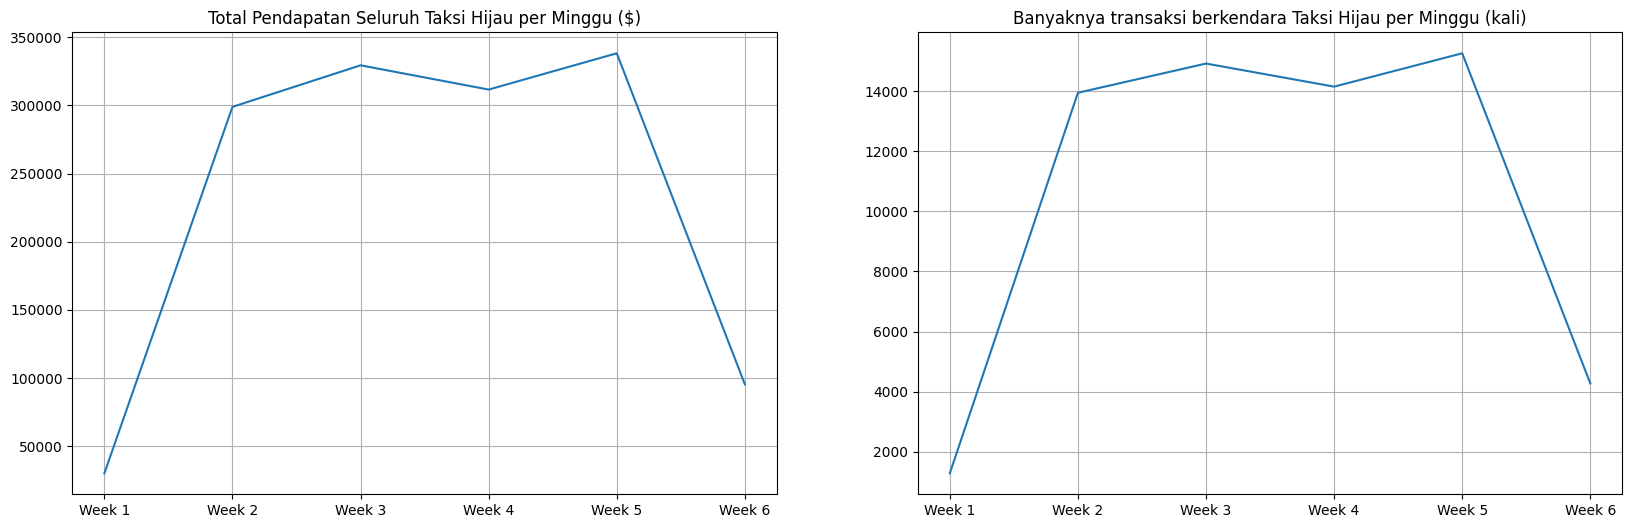

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.plot(PU_time_W_1['Week'], PU_time_W_1['total_amount_1'])

plt.title('Total Pendapatan Seluruh Taksi Hijau per Minggu ($)')
plt.grid()


plt.subplot(1,2,2)
plt.plot(PU_time_W_2['Week'], PU_time_W_2['total_amount_1'])

plt.title('Banyaknya transaksi berkendara Taksi Hijau per Minggu (kali)')
plt.grid()
plt.show()

> - Dilihat per minggu pada bulan Januari 2023, Total pendapatan tertinggi yang diterima semua pengemudi taksi hijau adalah sebesar `$ 338.123,89` terjadi pada `minggu ke-4` di tanggal 23 Januari 2023 sampai 29 Januari 2023 dengan total transaksi perjalanan sebanyak `15.259 kali`
> - Jika dilihat perminggu baik pada data pendapatan maupun data transaksi perjalanan, keduanya menunjukkan trend yang sama dan relatif stabil


*Insight*
1. Jika data di bagi per minggu, maka tidak mendapatkan tren dari grafik diatas. Hal ini menjadi acuan, bahwa data memupnyai trend yang mengulang setiap harinya.
2. Penurunan pada mingu pertama dan minggu terakhir, dikarenakan data yang didapat tidak lengkap, dan kami fokuskan melihat pada tanggal penjemputan. Dan kami menolerir tanggal pemberhentian dikarenakan perjalanan dimalam hari bisa akan sampai dihari berikutnya.

### 1.3. Melihat Pendapatan per Hari

Dengan mengingat laporan bulanan komisi NYC TLC [disini](https://www.nyc.gov/site/tlc/about/aggregated-reports.page)
- Jumlah pengemudi per Januari 2023 sebanyak 960 orang
- Jumlah armada per Januari 2023 sebanyak 911 kendaraan

In [ ]:
# Melihat total seluruh pendapatan taksi hijau per hari
PU_time_D_1 = nyc.groupby([nyc['lpep_pickup_datetime'].dt.to_period("D")])['total_amount_1'].sum().reset_index()
PU_time_D_1

,lpep_pickup_datetime,total_amount_1
0,2023-01-01,30274.71
1,2023-01-02,31285.64
2,2023-01-03,42394.79
3,2023-01-04,47267.17
4,2023-01-05,50233.89
5,2023-01-06,51356.06
6,2023-01-07,43511.88
7,2023-01-08,32803.41
8,2023-01-09,46712.67
9,2023-01-10,45020.46


In [ ]:
# Mengurutkan pendapatan perhari taksi hijau dari yang terbesar
PU_time_D_1.sort_values(by='total_amount_1', ascending=False).head()

,lpep_pickup_datetime,total_amount_1
25,2023-01-26,55963.52
24,2023-01-25,55616.72
18,2023-01-19,54224.44
12,2023-01-13,53035.51
11,2023-01-12,51986.64


In [ ]:
PU_time_D_1['lpep_pickup_datetime'] = PU_time_D_1['lpep_pickup_datetime'].astype(str)

In [ ]:
# Melihat banyaknya transaksi taksi hijau per hari
PU_time_D_3 = nyc.groupby([nyc['lpep_pickup_datetime'].dt.to_period("D")])['total_amount_1'].count().reset_index()
PU_time_D_3

,lpep_pickup_datetime,total_amount_1
0,2023-01-01,1287
1,2023-01-02,1462
2,2023-01-03,1981
3,2023-01-04,2258
4,2023-01-05,2245
5,2023-01-06,2391
6,2023-01-07,2039
7,2023-01-08,1570
8,2023-01-09,2109
9,2023-01-10,2045


In [ ]:
PU_time_D_3['lpep_pickup_datetime'] = PU_time_D_3['lpep_pickup_datetime'].astype(str)

In [ ]:
# Mengurutkan banyaknya transaksi perhari taksi hijau dari yang terbesar
PU_time_D_3.sort_values(by='total_amount_1', ascending=False).head()

,lpep_pickup_datetime,total_amount_1
24,2023-01-25,2497
25,2023-01-26,2495
18,2023-01-19,2428
5,2023-01-06,2391
11,2023-01-12,2369


In [ ]:
# Rata-rata pendapatan per hari semua taksi hijau
PU_time_D_3['total_amount_1'].mean()

2059.1290322580644

In [ ]:
# Rata-rata pendapatan per hari taksi hijau
PU_time_D_1['total_amount_1'].mean()/960

47.16202856182795

In [ ]:
# Rata-rata perjalanan per armada (911)
PU_time_D_3['total_amount_1'].mean() / 911

2.260295315321695

In [ ]:
# Rata-rata perjalanan per pengemudi (960)
PU_time_D_3['hitung_call'] = PU_time_D_3['total_amount_1'] / 960


In [ ]:
PU_time_D_3['hitung_call'].describe()

count    31.000000
mean      2.144926
std       0.345062
min       1.340625
25%       2.033333
50%       2.200000
75%       2.376562
max       2.601042
Name: hitung_call, dtype: float64

*Insight*
- Mengingat jumlah armada taksi hijau per Januari 2023 sebanyak `911 mobil`, maka transaksi perjalanan yang didapat per armada adalah 2 kali
- Mengingat jumlah pengemudi taksi hijau per Januari 2023 sebanyak `960 orang`, maka transaksi perjalanan yang didapat per orang adalah 2 kali
- Angka ini cukup miris untuk sebuah kota dengan jumlah penduduk sebesar 8.335.897 jiwa [disini](https://en.wikipedia.org/wiki/New_York_City)
- Pendapatan kotor yang diterima pengemudi per hari sebanyak \$47.16

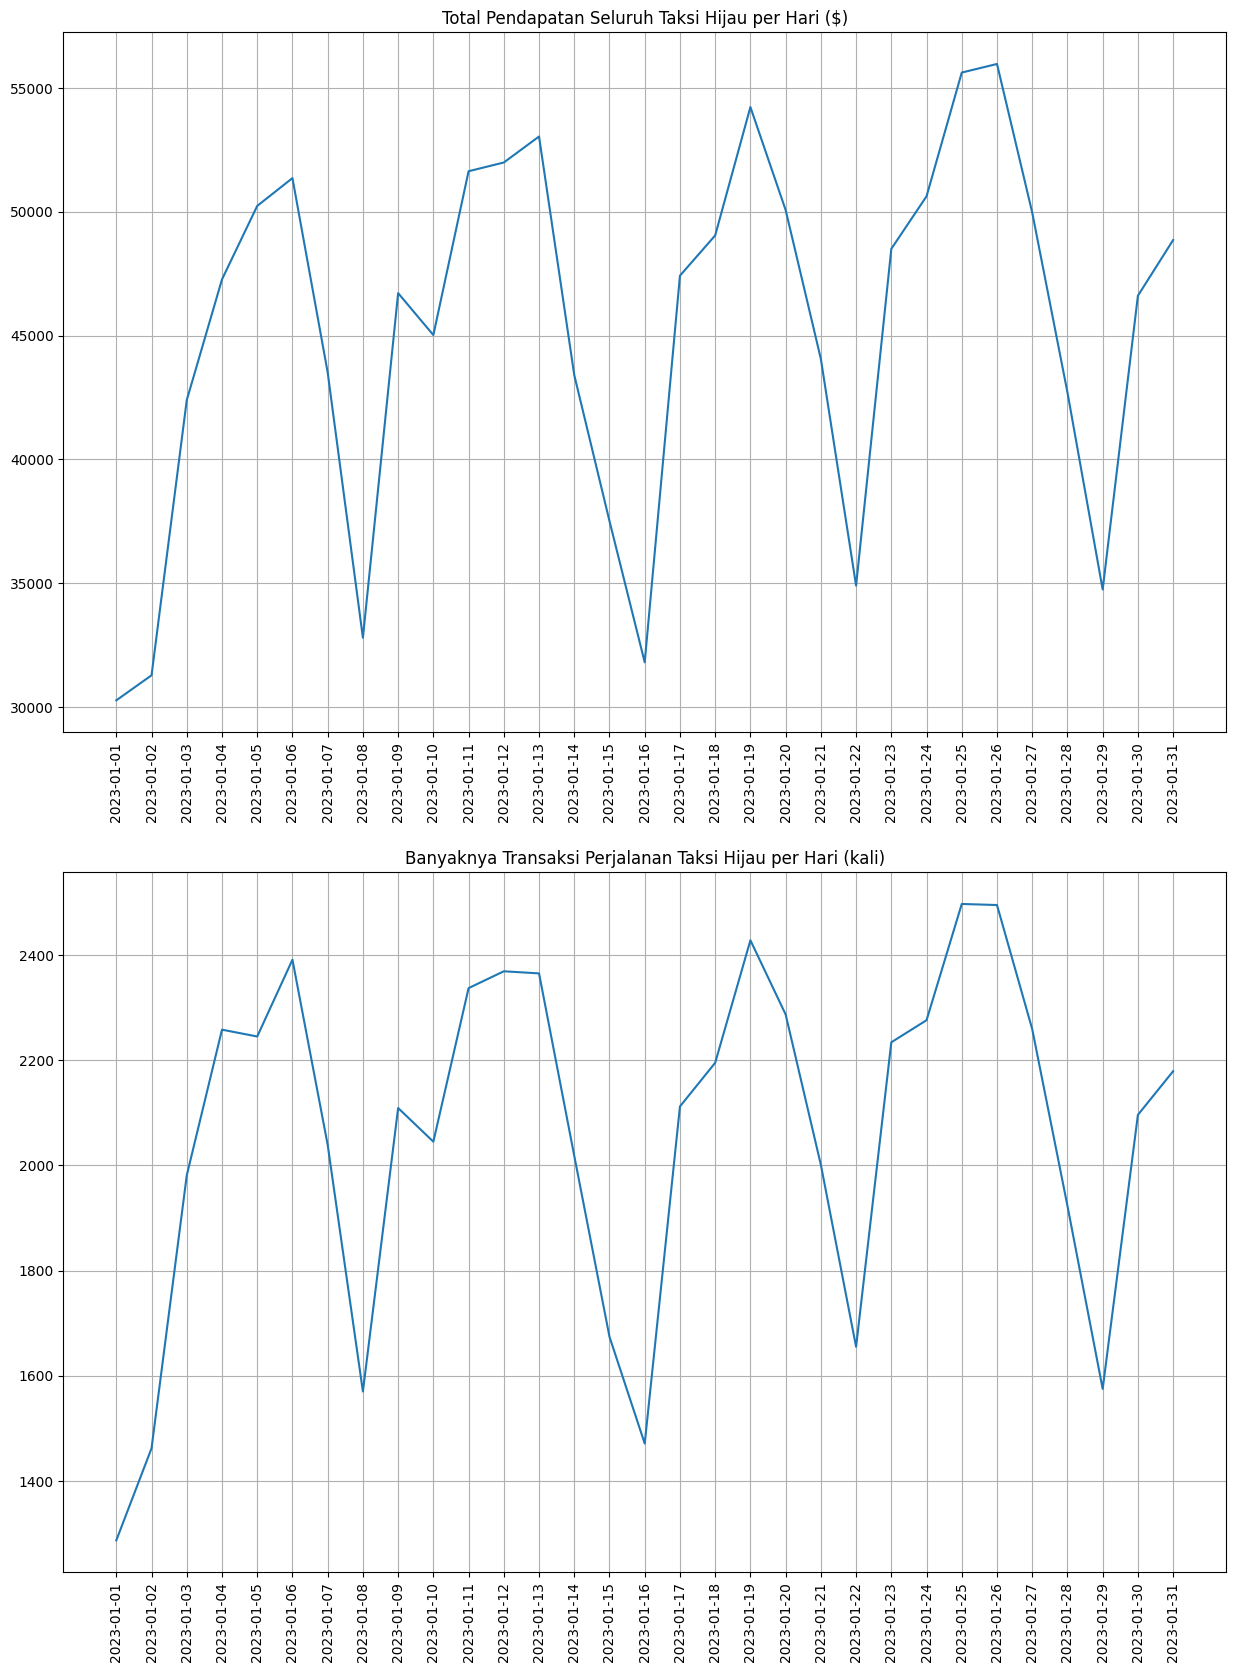

In [ ]:
# Grafik pendapatan dan banyaknya transaksi per hari
plt.figure(figsize=(15,20))
plt.subplot(2,1,1)
plt.plot(PU_time_D_1['lpep_pickup_datetime'], PU_time_D_1['total_amount_1'])

plt.title('Total Pendapatan Seluruh Taksi Hijau per Hari ($)')
plt.xticks(PU_time_D_1['lpep_pickup_datetime'], rotation=90)
plt.grid()


plt.subplot(2,1,2)
plt.plot(PU_time_D_3['lpep_pickup_datetime'], PU_time_D_3['total_amount_1'])

plt.title('Banyaknya Transaksi Perjalanan Taksi Hijau per Hari (kali)')
plt.xticks(PU_time_D_3['lpep_pickup_datetime'], rotation=90)
plt.grid()


plt.show()

> - Dilihat per hari pada bulan Januari 2023, Trend total pendapatan mempunyai pola yang fluktuatif, jika dilihat pada tabel pendapatan tertinggi yang diterima semua pengemudi taksi hijau adalah sebesar `$ 55963.52` terjadi pada tanggal `2023-01-26` dengan total transaksi perjalanan sebanyak `2495 kali`
> - Namun jika ditinjau dari banyaknya transaksi perjalanan, transaksi tertinggi pada tanggal `2023-01-25` sebanyak `2497` perjalanan. Trend perjalanan juga mempunyai pola fluktuatif yang sama dengan trend pendapatan.
> - Rata-rata transaksi perjalanan per hari adalah `1995 kali` atau `2 kali` per armada.
> - Rata-rata pendapatan kotor yang diterima oleh pengemudi perhari adalah `$47.16`

In [ ]:
# Melihat total pendapatan dengan periode harian
PU_time_D_2 = nyc.groupby([nyc['lpep_pickup_datetime'].dt.day_name()])['total_amount_1'].sum().reset_index().sort_values(by='lpep_pickup_datetime')

PU_time_D_2["urutan"] = [5,1,6,7,4,2,3]
PU_time_D_2 = PU_time_D_2.sort_values(by="urutan")
PU_time_D_2

,lpep_pickup_datetime,total_amount_1,urutan
1,Monday,204915.51,1
5,Tuesday,234311.65,2
6,Wednesday,203558.80,3
4,Thursday,212408.49,4
0,Friday,204425.35,5
2,Saturday,173679.55,6
3,Sunday,170242.62,7


In [ ]:
# Melihat banyaknya transaksi dengan periode harian
PU_time_D_4 = nyc.groupby([nyc['lpep_pickup_datetime'].dt.day_name()])['total_amount_1'].count().reset_index().sort_values(by='lpep_pickup_datetime')

PU_time_D_4["urutan"] = [5,1,6,7,4,2,3]
PU_time_D_4 = PU_time_D_4.sort_values(by="urutan")
PU_time_D_4

,lpep_pickup_datetime,total_amount_1,urutan
1,Monday,9372,1
5,Tuesday,10593,2
6,Wednesday,9287,3
4,Thursday,9537,4
0,Friday,9302,5
2,Saturday,7981,6
3,Sunday,7761,7


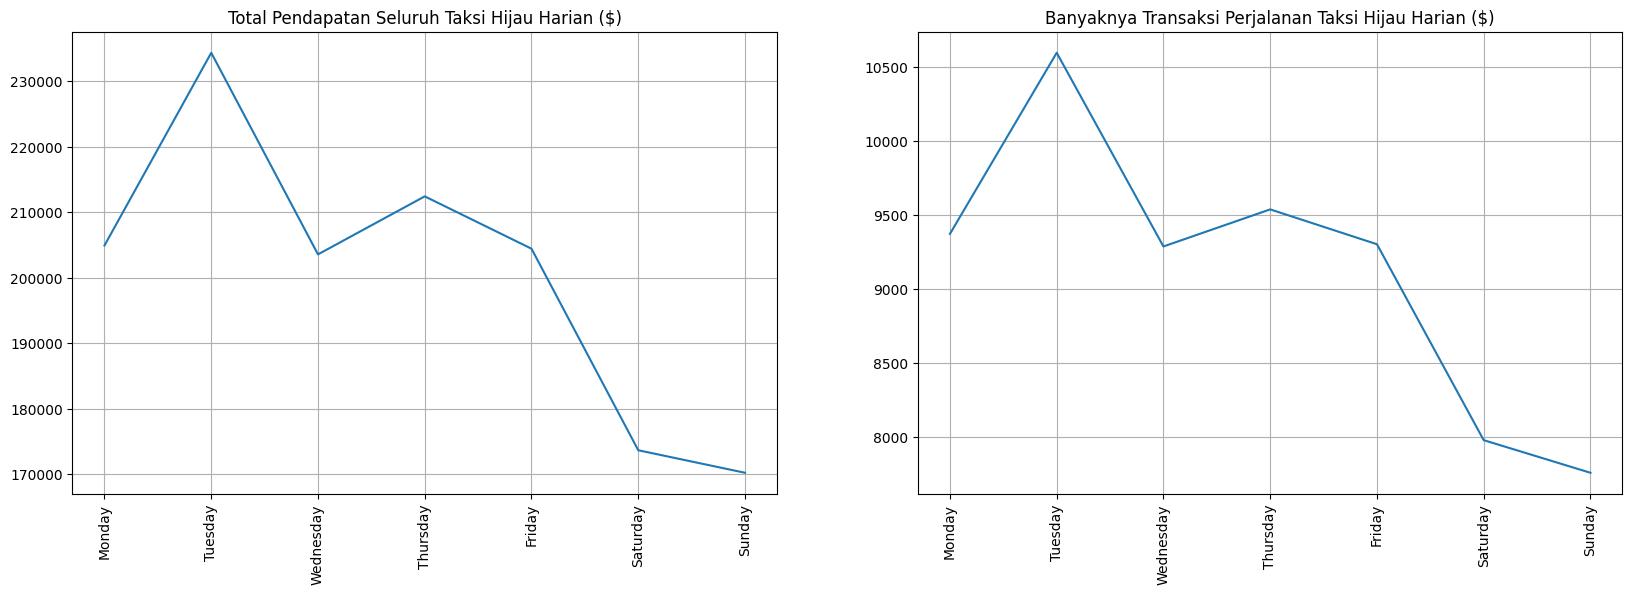

In [ ]:
# Membuat grafik dengan total pendapatan dan transaksi perjalanan periode harian
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(PU_time_D_2['lpep_pickup_datetime'], PU_time_D_2['total_amount_1'])

plt.title('Total Pendapatan Seluruh Taksi Hijau Harian ($)')
plt.xticks(PU_time_D_2['lpep_pickup_datetime'], rotation=90)
plt.grid()


plt.subplot(1,2,2)
plt.plot(PU_time_D_4['lpep_pickup_datetime'], PU_time_D_4['total_amount_1'])

plt.title('Banyaknya Transaksi Perjalanan Taksi Hijau Harian ($)')
plt.xticks(PU_time_D_4['lpep_pickup_datetime'], rotation=90)
plt.grid()


plt.show()

*Insight*
- Jika kita kelompokkan dalam harian, baik pada grafik total pendapatan maupun banyaknya transaksi perjalanan, maka trend terlihat ada pelonjakan pada hari `Selasa` dan menurun pada hari `Sabtu` `Minggu`. Hal ini menunjukkan penumpang taksi hijau adalah orang-orang yang mempunyai mobilitas tinggi pada *weekday* dan rendah saat *weekend*.

### 1.4. Pendapatan dan transaksi perjalanan terbanyak berdasarkan `RatecodeID`

In [ ]:

RatecodeID_1 = pd.pivot_table(nyc, values = 'total_amount_1', index='RatecodeID', aggfunc='sum').sort_values(by=['total_amount_1'], ascending=False).reset_index()

RatecodeID_2 = pd.pivot_table(nyc, values = 'total_amount_1', index='RatecodeID', aggfunc='count').sort_values(by=['total_amount_1'], ascending=False).reset_index()

RatecodeID_3 = RatecodeID_1.merge(RatecodeID_2, left_on='RatecodeID', right_on='RatecodeID',suffixes=('_SUM', '_COUNT'))
RatecodeID_3


,RatecodeID,total_amount_1_SUM,total_amount_1_COUNT
0,Standard rate,1330683.24,62064
1,Negotiated fare,51226.84,1525
2,JFK,13416.25,158
3,Nassau or Westchester,5906.44,57
4,Newark,2309.20,29


In [ ]:
RatecodeID_3a = RatecodeID_3.copy()

In [ ]:
# Mengubah kategori 'JFK', 'Nassau or Westchester', 'Newark' menjadi 'Others'
RatecodeID_3a['RatecodeID'] = RatecodeID_3['RatecodeID'].apply(lambda x: x if (x == 'Standard rate') or (x == 'Negotiated fare') else 'Other')
RatecodeID_3a = RatecodeID_3a.groupby('RatecodeID').agg(total_amount_1_SUM = ('total_amount_1_SUM', 'sum'), total_amount_1_COUNT = ('total_amount_1_COUNT', 'sum')).sort_values(by = 'total_amount_1_SUM', ascending = False).reset_index()
RatecodeID_3a

,RatecodeID,total_amount_1_SUM,total_amount_1_COUNT
0,Standard rate,1330683.24,62064
1,Negotiated fare,51226.84,1525
2,Other,21631.89,244


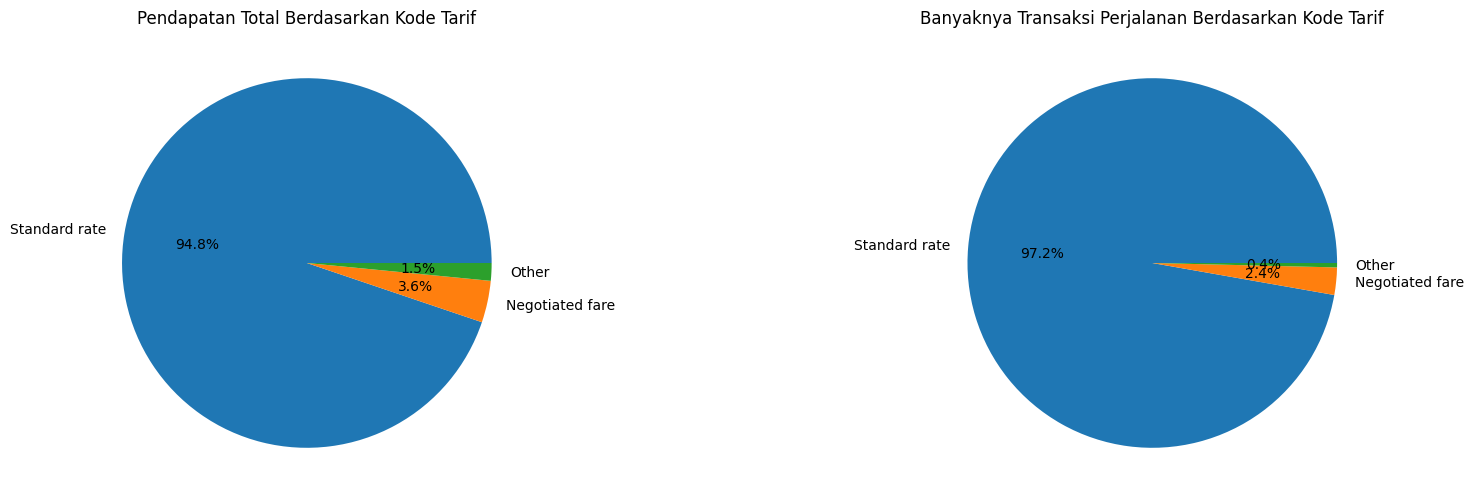

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.pie(
    x = RatecodeID_3a['total_amount_1_SUM'],
    labels= RatecodeID_3a['RatecodeID'],
    autopct= '%.1f%%'
)
plt.title('Pendapatan Total Berdasarkan Kode Tarif')

plt.subplot(1,2,2)
plt.pie(
    x = RatecodeID_3a['total_amount_1_COUNT'],
    labels= RatecodeID_3a['RatecodeID'],
    autopct= '%.1f%%'
)
plt.title('Banyaknya Transaksi Perjalanan Berdasarkan Kode Tarif')

sns.color_palette("magma", as_cmap=True)

plt.show()

>Total pendapatan terbanyak ada pada tarif `Standaard Rate` sebesar `94.8%` dan Banyaknya transaksi perjalanan berdasarkan kode tarif terbanyak ada pada `Standart Rate` sebesar `97.2%` dari transaksi Januari 2023.

### 1.5. Pendapatan dan transaksi terbanyak berdasarkan `Jenis Pemanggilan Taksi`

In [ ]:

trip_type_1 = pd.pivot_table(nyc, values = 'total_amount_1', index='trip_type', aggfunc='sum').sort_values(by=['total_amount_1'], ascending=False).reset_index()

trip_type_2 = pd.pivot_table(nyc, values = 'total_amount_1', index='trip_type', aggfunc='count').sort_values(by=['total_amount_1'], ascending=False).reset_index()

trip_type_3 = trip_type_1.merge(trip_type_2, left_on='trip_type', right_on='trip_type',suffixes=('_SUM', '_COUNT'))
trip_type_3

,trip_type,total_amount_1_SUM,total_amount_1_COUNT
0,Street-hail,1355366.76,62435
1,Dispatch,48175.21,1398


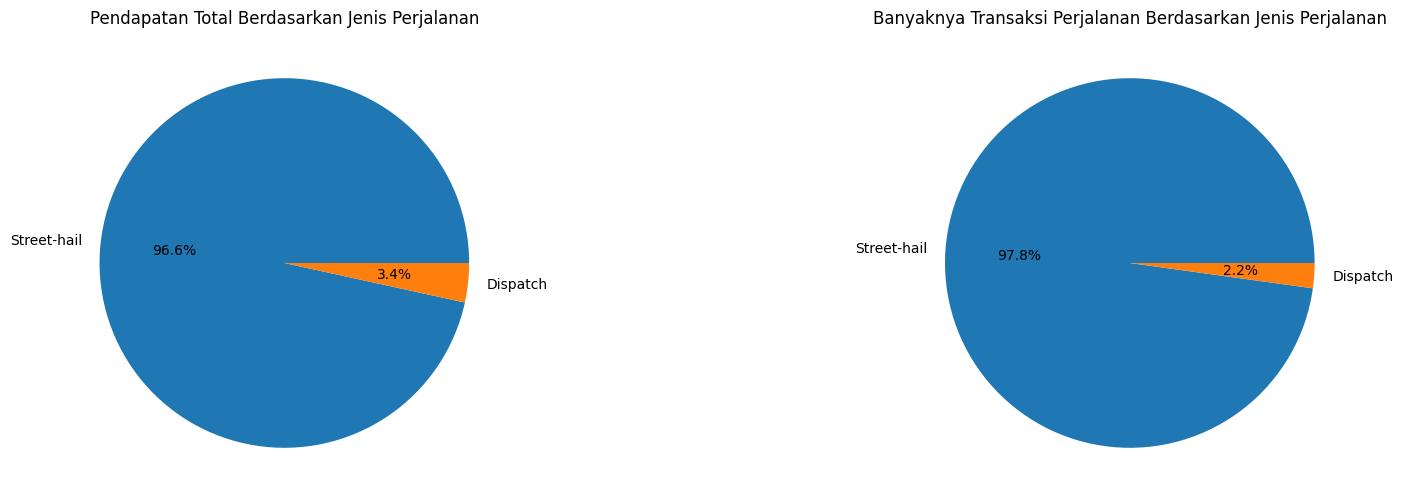

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.pie(
    x = trip_type_3['total_amount_1_SUM'],
    labels= trip_type_3['trip_type'],
    autopct= '%.1f%%'
)
plt.title('Pendapatan Total Berdasarkan Jenis Perjalanan')

plt.subplot(1,2,2)
plt.pie(
    x = trip_type_3['total_amount_1_COUNT'],
    labels= trip_type_3['trip_type'],
    autopct= '%.1f%%'
)
plt.title('Banyaknya Transaksi Perjalanan Berdasarkan Jenis Perjalanan')

plt.show()

*Insight*
97.8% dari transaksi perjalanan lebih memilih memanggil taksi ditempat daripada memesan lewat aplikasi. Dengan mendapatkan total pendapatan sebesar $1355366.76.
Dengan ini bisa menjadi indikais bahwa aplikasi untuk memesan taksi hijau maish kurang populer dikalangan masyarakat. Sehinggal penumpang lebih memilih naik taksi dengan langsung memanggil dijalan.

### 1.6. Pendapatan dan transaksi terbanyak berdasarkan `Jenis Cara Pembayaran`

In [ ]:

payment_type_1 = pd.pivot_table(nyc, values = 'total_amount_1', index='payment_type', aggfunc='sum').sort_values(by=['total_amount_1'], ascending=False).reset_index()

payment_type_2 = pd.pivot_table(nyc, values = 'total_amount_1', index='payment_type', aggfunc='count').sort_values(by=['total_amount_1'], ascending=False).reset_index()

payment_type_3 = payment_type_1.merge(payment_type_2, left_on='payment_type', right_on='payment_type',suffixes=('_SUM', '_COUNT'))
payment_type_3

,payment_type,total_amount_1_SUM,total_amount_1_COUNT
0,Credit card,973483.07,40647
1,Cash,424444.35,22619
2,No charge,4747.20,470
3,Dispute,837.85,95
4,Unknown,29.50,2


In [ ]:
payment_type_3a = payment_type_3.copy()

In [ ]:
# Mengubah kategori 'No charge', 'Dispute', 'Unknown' menjadi 'Others'
payment_type_3a ['payment_type'] = payment_type_3a ['payment_type'].apply(lambda x: x if (x == 'Credit card') or (x == 'Cash') else 'Other')
payment_type_3a  = payment_type_3a .groupby('payment_type').agg(total_amount_1_SUM = ('total_amount_1_SUM', 'sum'), total_amount_1_COUNT = ('total_amount_1_COUNT', 'sum')).sort_values(by = 'total_amount_1_SUM', ascending = False).reset_index()
payment_type_3a

,payment_type,total_amount_1_SUM,total_amount_1_COUNT
0,Credit card,973483.07,40647
1,Cash,424444.35,22619
2,Other,5614.55,567


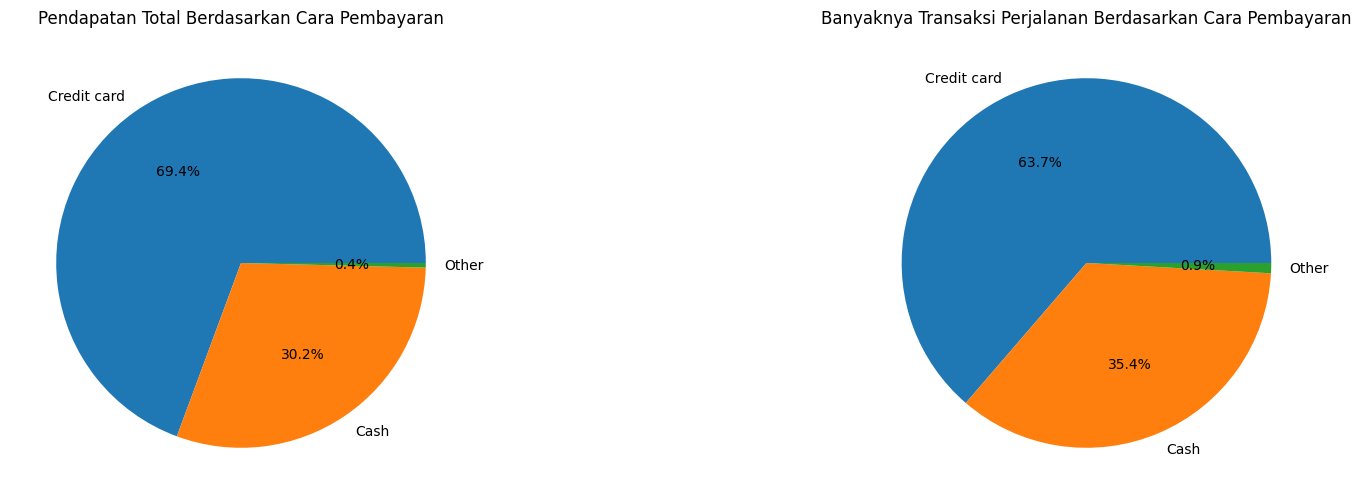

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.pie(
    x = payment_type_3a['total_amount_1_SUM'],
    labels= payment_type_3a['payment_type'],
    autopct= '%.1f%%'
)
plt.title('Pendapatan Total Berdasarkan Cara Pembayaran')

plt.subplot(1,2,2)
plt.pie(
    x = payment_type_3a['total_amount_1_COUNT'],
    labels= payment_type_3a['payment_type'],
    autopct= '%.1f%%'
)
plt.title('Banyaknya Transaksi Perjalanan Berdasarkan Cara Pembayaran')

plt.show()

> Cara pembayaran yang paling sering digunakan saat transaksi adalah dengan Credit Card sebesar 63.7% dari transaksi kemudian Cash sebesar 35.4% dari transaksi. Pada pembayaran Credit Card mendapatkan 69.4% dari keseluruhan total pendapatan yakni sebesar \$973517.03 dan pembayaran Cash sebesar $424444.35.

### 1.7. Pendapatan dan transaksi terbanyak berdasarkan `Pickup zone`

In [ ]:

PU1 = pd.pivot_table(nyc, values = 'total_amount_1', index=['PULocationID','PU_Zone','PU_Borough','PU_Service_Zone'], \
            aggfunc='sum').sort_values(by=['total_amount_1'], ascending=False).head(10).reset_index()

PU2 = pd.pivot_table(nyc, values = 'total_amount_1', index=['PULocationID','PU_Zone','PU_Borough','PU_Service_Zone'], \
            aggfunc='count').sort_values(by=['total_amount_1'], ascending=False).head(10).reset_index()

PUtrans = PU1.merge(PU2, left_on='PULocationID', right_on='PULocationID',suffixes=('_sum', '_count'))

PUtrans

,PULocationID,PU_Zone_sum,PU_Borough_sum,PU_Service_Zone_sum,total_amount_1_sum,PU_Zone_count,PU_Borough_count,PU_Service_Zone_count,total_amount_1_count
0,74,East Harlem North,Manhattan,Boro Zone,260338.61,East Harlem North,Manhattan,Boro Zone,12954
1,75,East Harlem South,Manhattan,Boro Zone,187430.01,East Harlem South,Manhattan,Boro Zone,8847
2,166,Morningside Heights,Manhattan,Boro Zone,79528.99,Morningside Heights,Manhattan,Boro Zone,3599
3,95,Forest Hills,Queens,Boro Zone,72886.24,Forest Hills,Queens,Boro Zone,3814
4,43,Central Park,Manhattan,Yellow Zone,69259.80,Central Park,Manhattan,Yellow Zone,2851
5,41,Central Harlem,Manhattan,Boro Zone,68044.06,Central Harlem,Manhattan,Boro Zone,3742
6,82,Elmhurst,Queens,Boro Zone,61422.15,Elmhurst,Queens,Boro Zone,2872
7,244,Washington Heights South,Manhattan,Boro Zone,51970.05,Washington Heights South,Manhattan,Boro Zone,1624
8,97,Fort Greene,Brooklyn,Boro Zone,45920.16,Fort Greene,Brooklyn,Boro Zone,2137
9,7,Astoria,Queens,Boro Zone,36931.85,Astoria,Queens,Boro Zone,1822


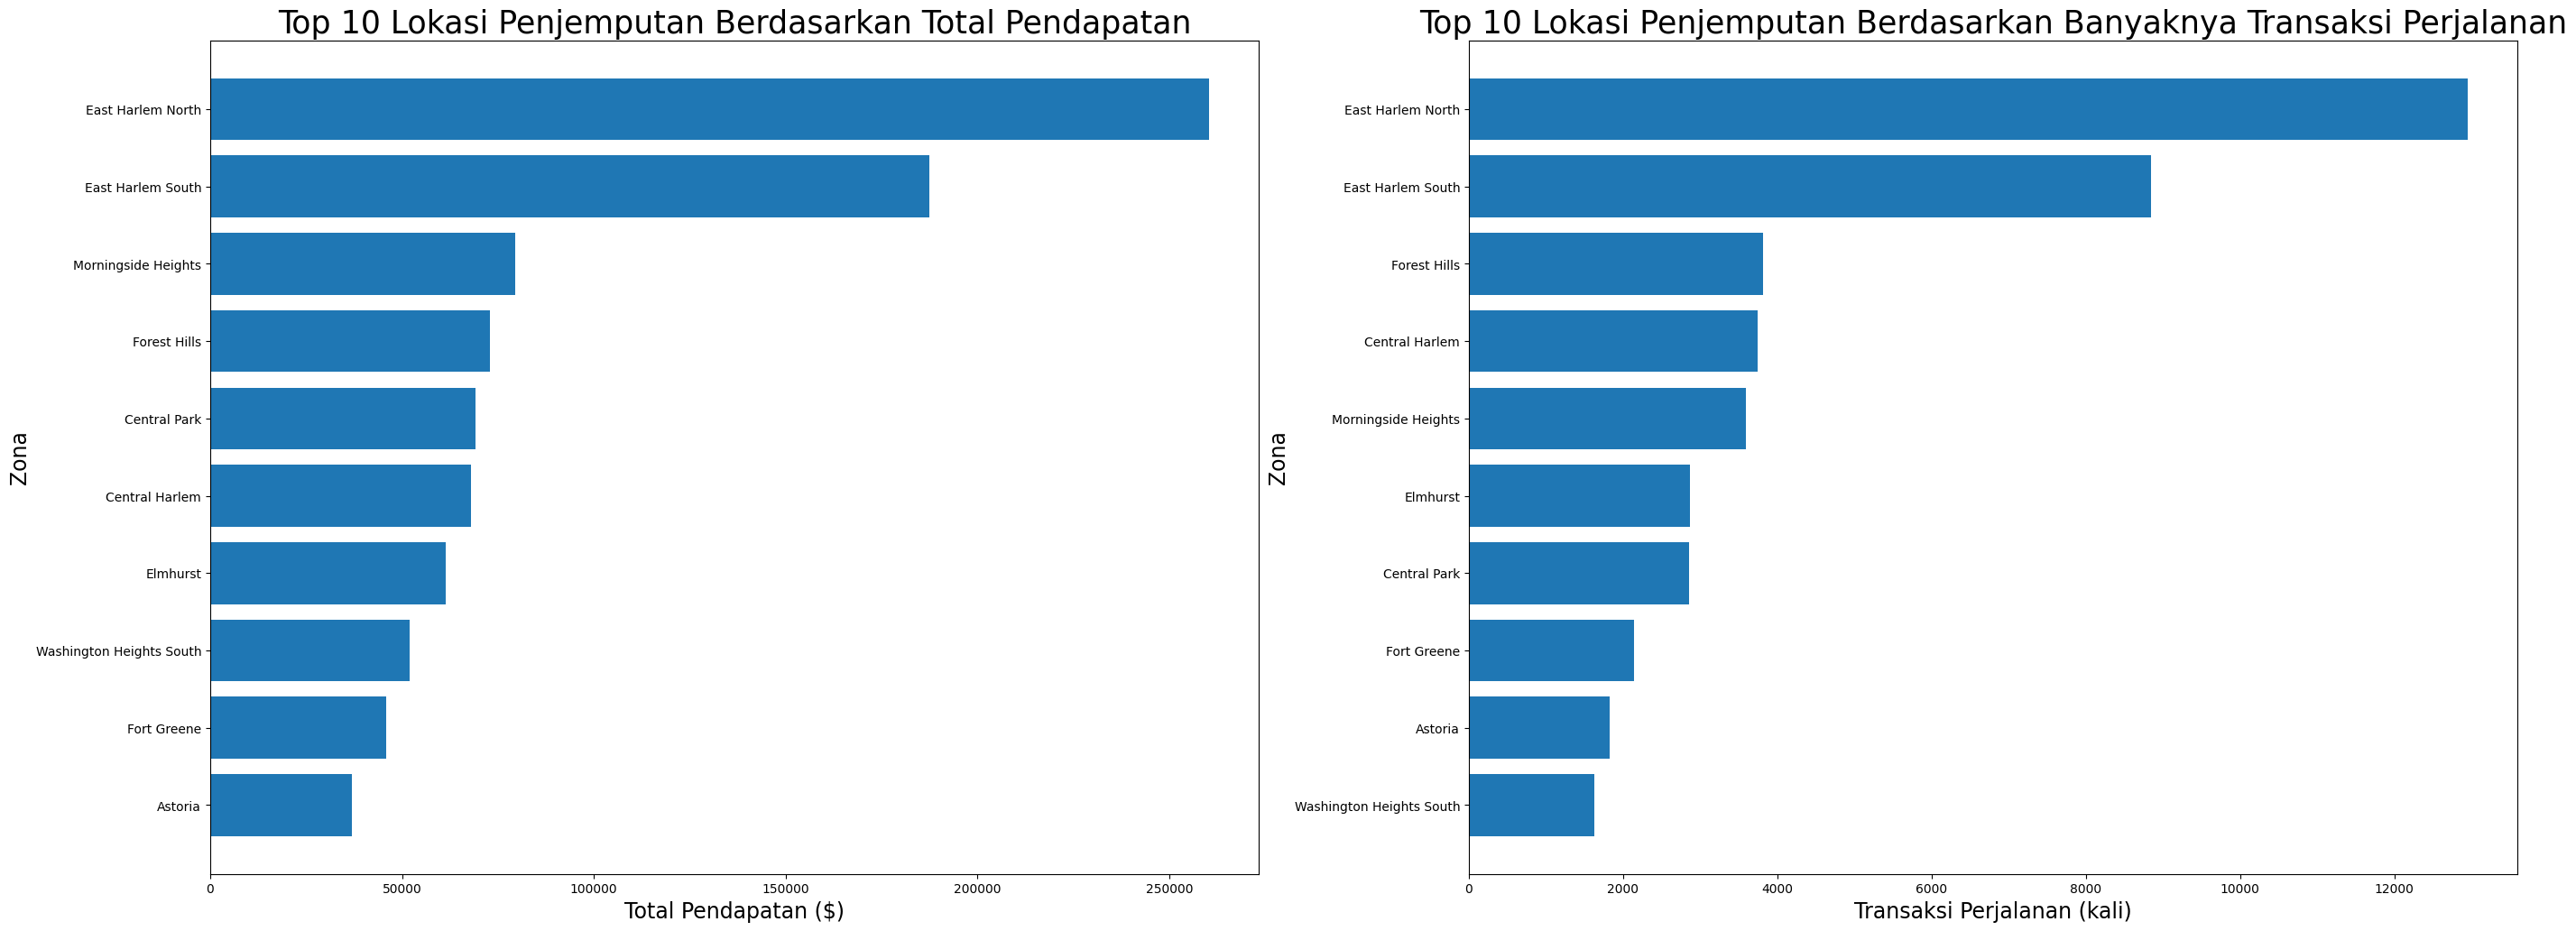

In [ ]:
plt.figure(figsize=(33,12))

plt.subplot(1,2,1)
plt.barh(y=PUtrans.sort_values(by='total_amount_1_sum')['PU_Zone_sum'],
         width=PUtrans.sort_values(by='total_amount_1_sum')['total_amount_1_sum'])
plt.title('Top 10 Lokasi Penjemputan Berdasarkan Total Pendapatan', fontsize=25)
plt.ylabel('Zona', fontsize=17)
plt.xlabel('Total Pendapatan ($)', fontsize=17)

plt.subplot(1,2,2)
plt.barh(y=PUtrans.sort_values(by='total_amount_1_count')['PU_Zone_count'],
         width=PUtrans.sort_values(by='total_amount_1_count')['total_amount_1_count'])
plt.title('Top 10 Lokasi Penjemputan Berdasarkan Banyaknya Transaksi Perjalanan', fontsize=25)
plt.ylabel('Zona', fontsize=17)
plt.xlabel('Transaksi Perjalanan (kali)', fontsize=17)

plt.show()

>Lokasi dengan intensitas penjemputan tertinggi sebanyak `12954 kali` dan menghasilkan pendapatan tertinggi sebesar `$ 260338.61` adalah `East Harlem North`

### 1.8. Pendapatan dan transaksi terbanyak berdasarkan `Dropoff zone`

In [ ]:
DO1 = pd.pivot_table(nyc, values = 'total_amount_1', index=['DOLocationID','DO_Zone','DO_Borough','DO_Service_Zone'],
            aggfunc='sum').sort_values(by=['total_amount_1'], ascending=False).head(10).reset_index()

DO2 = pd.pivot_table(nyc, values = 'total_amount_1', index=['DOLocationID','DO_Zone','DO_Borough','DO_Service_Zone'],
            aggfunc='count').sort_values(by=['total_amount_1'], ascending=False).head(10).reset_index()

DOtrans = DO1.merge(DO2, left_on='DOLocationID', right_on='DOLocationID',suffixes=('_sum', '_count'))

DOtrans

,DOLocationID,DO_Zone_sum,DO_Borough_sum,DO_Service_Zone_sum,total_amount_1_sum,DO_Zone_count,DO_Borough_count,DO_Service_Zone_count,total_amount_1_count
0,236,Upper East Side North,Manhattan,Yellow Zone,57919.19,Upper East Side North,Manhattan,Yellow Zone,2656
1,238,Upper West Side North,Manhattan,Yellow Zone,47126.33,Upper West Side North,Manhattan,Yellow Zone,2239
2,75,East Harlem South,Manhattan,Boro Zone,46340.46,East Harlem South,Manhattan,Boro Zone,3415
3,74,East Harlem North,Manhattan,Boro Zone,41851.53,East Harlem North,Manhattan,Boro Zone,3297
4,239,Upper West Side South,Manhattan,Yellow Zone,37960.01,Upper West Side South,Manhattan,Yellow Zone,1403
5,263,Yorkville West,Manhattan,Yellow Zone,34177.95,Yorkville West,Manhattan,Yellow Zone,1511
6,166,Morningside Heights,Manhattan,Boro Zone,32774.43,Morningside Heights,Manhattan,Boro Zone,2179
7,41,Central Harlem,Manhattan,Boro Zone,30663.41,Central Harlem,Manhattan,Boro Zone,2529
8,42,Central Harlem North,Manhattan,Boro Zone,30085.11,Central Harlem North,Manhattan,Boro Zone,2247


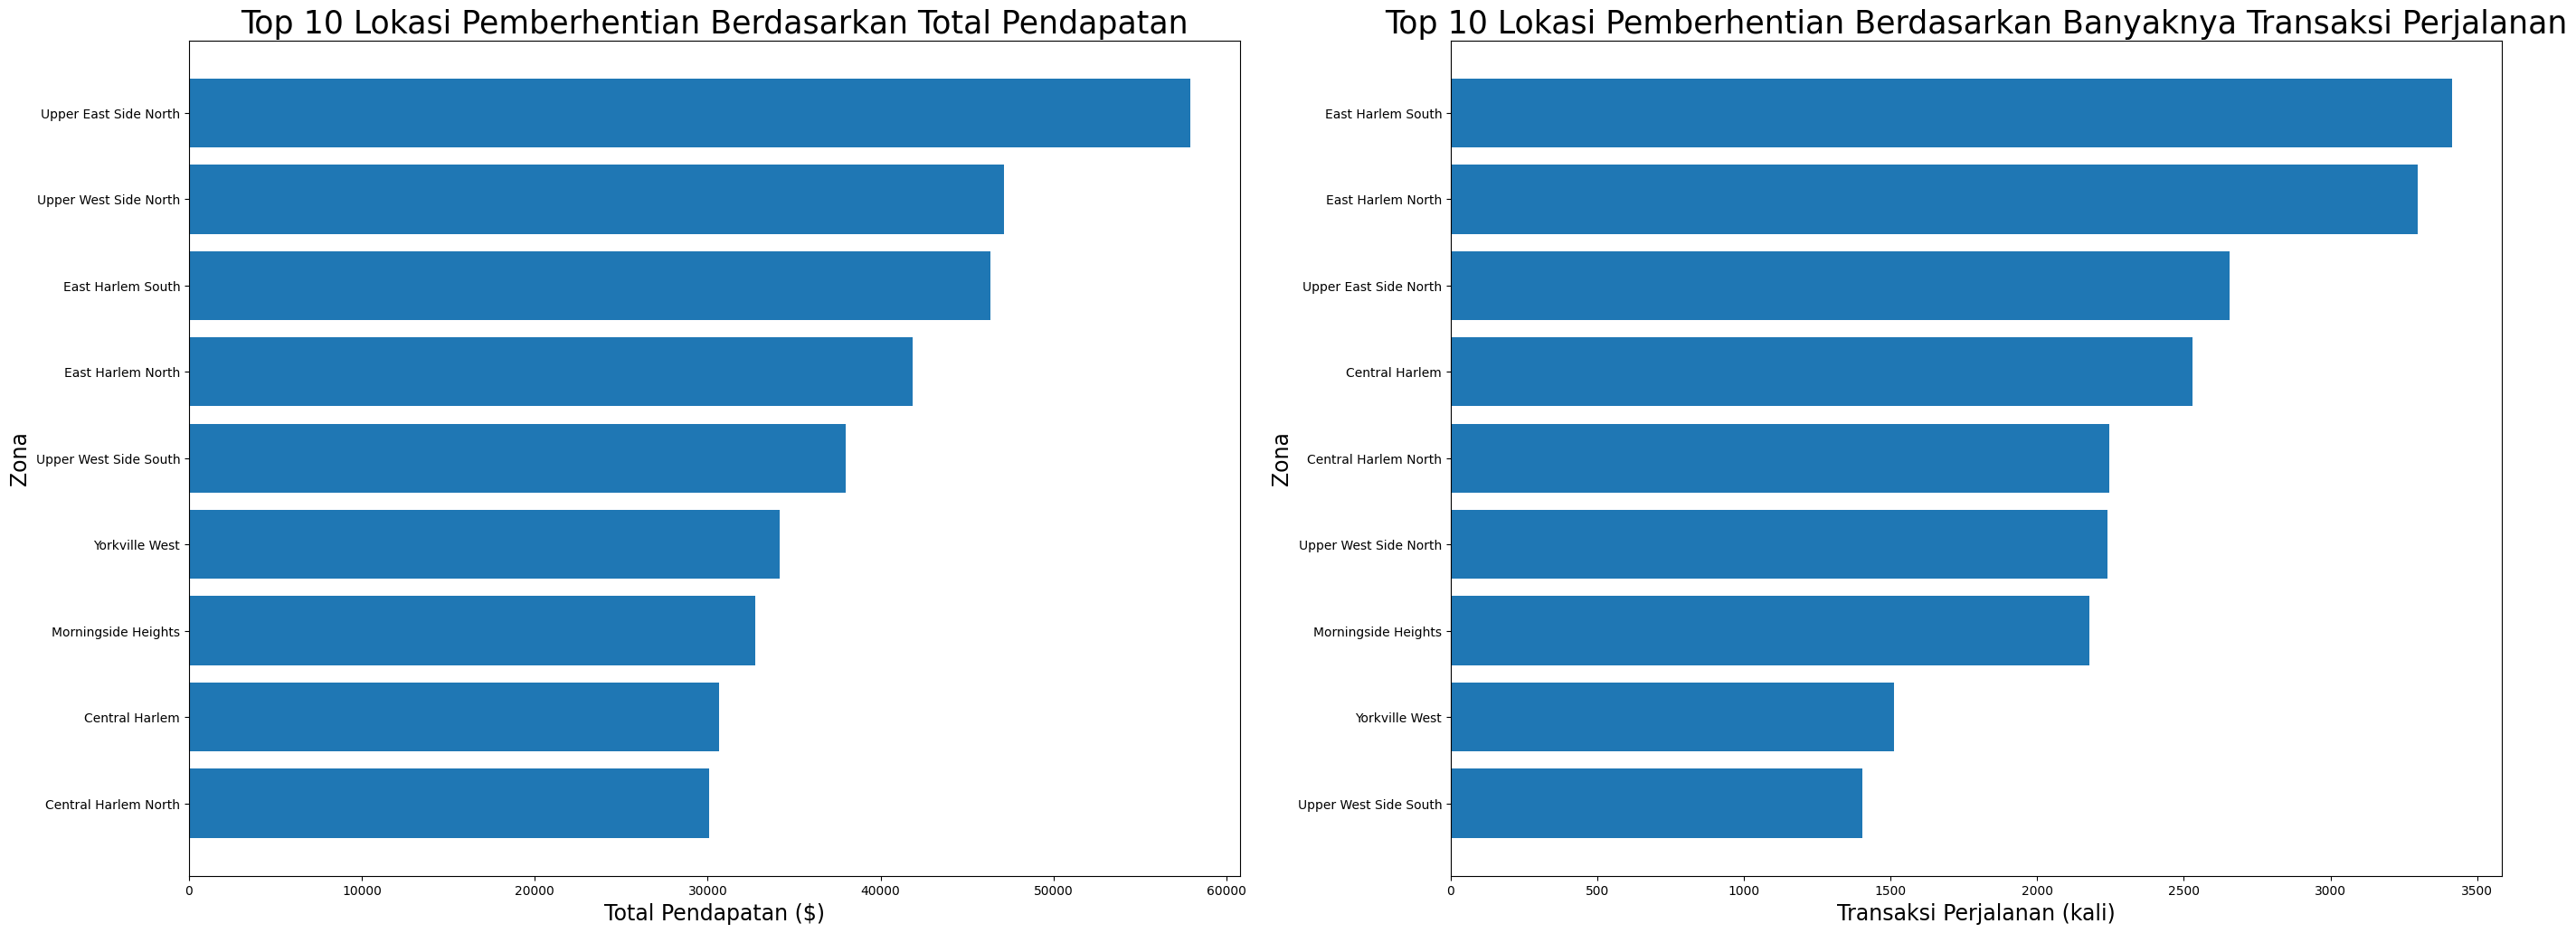

In [ ]:
plt.figure(figsize=(33,12))

plt.subplot(1,2,1)
plt.barh(y=DOtrans.sort_values(by='total_amount_1_sum')['DO_Zone_sum'],
         width=DOtrans.sort_values(by='total_amount_1_sum')['total_amount_1_sum'])
plt.title('Top 10 Lokasi Pemberhentian Berdasarkan Total Pendapatan', fontsize=25)
plt.ylabel('Zona', fontsize=17)
plt.xlabel('Total Pendapatan ($)', fontsize=17)

plt.subplot(1,2,2)
plt.barh(y=DOtrans.sort_values(by='total_amount_1_count')['DO_Zone_count'],
         width=DOtrans.sort_values(by='total_amount_1_count')['total_amount_1_count'])
plt.title('Top 10 Lokasi Pemberhentian Berdasarkan Banyaknya Transaksi Perjalanan', fontsize=25)
plt.ylabel('Zona', fontsize=17)
plt.xlabel('Transaksi Perjalanan (kali)', fontsize=17)

plt.show()

> - Lokasi dengan intensitas penjemputan tertinggi sebanyak `3415 kali` adalah `East Harlem North`. Ini menandakan pengguna taksi hijau berada disekitar daerah `East Harlem`
> - Lokasi penjemputan yang menghasilkan pendapatan tertinggi sebesar `$ 57919.19` berada pada `Upper East side North`

### 1.9. Zona Pickup & Droppoff terbanyak

In [ ]:
nyc_opr1 = nyc.copy()

In [ ]:
nyc_opr1.head(2)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,payment_type,trip_type,congestion_surcharge,total_amount_1,PU_Borough,PU_Zone,PU_Service_Zone,DO_Borough,DO_Zone,DO_Service_Zone
0,VeriFone Inc,2023-01-01 00:26:10,2023-01-01 00:37:11,11.02,N,Standard rate,166,143,1.0,2.58,...,Credit card,Street-hail,2.75,26.93,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,VeriFone Inc,2023-01-01 00:51:03,2023-01-01 00:57:49,6.77,N,Standard rate,24,43,1.0,1.81,...,Credit card,Street-hail,0.00,15.84,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone


In [ ]:
nyc_opr1['hari_pickup'] = nyc_opr1['lpep_pickup_datetime'].dt.day_name()

In [ ]:
nyc_opr1['hari_dropoff'] = nyc_opr1['lpep_dropoff_datetime'].dt.day_name()

In [ ]:
nyc_opr1.head(2)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,congestion_surcharge,total_amount_1,PU_Borough,PU_Zone,PU_Service_Zone,DO_Borough,DO_Zone,DO_Service_Zone,hari_pickup,hari_dropoff
0,VeriFone Inc,2023-01-01 00:26:10,2023-01-01 00:37:11,11.02,N,Standard rate,166,143,1.0,2.58,...,2.75,26.93,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone,Sunday,Sunday
1,VeriFone Inc,2023-01-01 00:51:03,2023-01-01 00:57:49,6.77,N,Standard rate,24,43,1.0,1.81,...,0.00,15.84,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone,Sunday,Sunday


In [ ]:
nyc_opr1[nyc_opr1['hari_pickup'] != nyc_opr1['hari_dropoff']]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,congestion_surcharge,total_amount_1,PU_Borough,PU_Zone,PU_Service_Zone,DO_Borough,DO_Zone,DO_Service_Zone,hari_pickup,hari_dropoff
108,VeriFone Inc,2023-01-01 01:53:59,2023-01-02 00:00:00,1326.02,N,Standard rate,260,223,1.0,2.64,...,0.0,17.40,Queens,Woodside,Boro Zone,Queens,Steinway,Boro Zone,Sunday,Monday
118,VeriFone Inc,2023-01-01 01:25:46,2023-01-02 00:29:15,1383.48,N,Standard rate,129,37,1.0,6.53,...,0.0,33.50,Queens,Jackson Heights,Boro Zone,Brooklyn,Bushwick South,Boro Zone,Sunday,Monday
207,VeriFone Inc,2023-01-01 03:12:42,2023-01-02 02:03:43,1371.02,N,Negotiated fare,129,129,1.0,0.72,...,0.0,26.39,Queens,Jackson Heights,Boro Zone,Queens,Jackson Heights,Boro Zone,Sunday,Monday
262,VeriFone Inc,2023-01-01 04:03:36,2023-01-02 03:31:50,1408.23,N,Standard rate,65,37,5.0,3.61,...,0.0,23.00,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,Brooklyn,Bushwick South,Boro Zone,Sunday,Monday
633,VeriFone Inc,2023-01-01 12:29:17,2023-01-02 11:52:01,1402.73,N,Standard rate,74,239,1.0,3.61,...,0.0,28.92,Manhattan,East Harlem North,Boro Zone,Manhattan,Upper West Side South,Yellow Zone,Sunday,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63225,VeriFone Inc,2023-01-31 18:22:24,2023-02-01 00:00:00,337.60,N,Standard rate,82,82,1.0,1.46,...,0.0,14.70,Queens,Elmhurst,Boro Zone,Queens,Elmhurst,Boro Zone,Tuesday,Wednesday
63408,VeriFone Inc,2023-01-31 19:40:22,2023-02-01 00:00:00,259.63,N,Standard rate,226,173,1.0,2.94,...,0.0,18.90,Queens,Sunnyside,Boro Zone,Queens,North Corona,Boro Zone,Tuesday,Wednesday
63804,VeriFone Inc,2023-01-31 23:56:16,2023-02-01 00:03:16,7.00,N,Standard rate,95,196,1.0,1.16,...,0.0,13.32,Queens,Forest Hills,Boro Zone,Queens,Rego Park,Boro Zone,Tuesday,Wednesday
63818,VeriFone Inc,2023-01-31 23:58:23,2023-02-01 00:07:16,8.88,N,Standard rate,95,135,1.0,1.39,...,0.0,15.84,Queens,Forest Hills,Boro Zone,Queens,Kew Gardens Hills,Boro Zone,Tuesday,Wednesday


Kami menemukan data dimana penjemputan dan pemberhentian pada hari yang berbeda. Jika kami analisa dengan melihat 5 data awal dan akhir tidak ada keanehan pada jarak tempuh dan biaya perjalanan, namun memang ada beberapa data yang menunjukkan waktu perjalanan yang tidak semestinya ditempuh dengan jarak tersebut, ada juga data yang menunjukkan adanya transaksi di malam hari sehingga pemberhentian terekam dihari berikutnya. Oleh karena itu kami akan mengabaikan keanehan ini dan fokus pada data **hari penjemputan** sebagai analisis selanjutnya.

In [ ]:
# Top 10 lokasi pemberhentian dengan lokasi penjemputan
trip = nyc_opr1.groupby(by=['PU_Zone','DO_Zone'])[['total_amount_1']].count().reset_index()
trip[trip['PU_Zone'] == 'East Harlem South'].sort_values(by='total_amount_1', ascending=False).head(10)

,PU_Zone,DO_Zone,total_amount_1
1789,East Harlem South,East Harlem North,1429
1790,East Harlem South,East Harlem South,748
1895,East Harlem South,Upper East Side North,651
1897,East Harlem South,Upper West Side North,536
1913,East Harlem South,Yorkville West,469
1770,East Harlem South,Central Harlem,444
1896,East Harlem South,Upper East Side South,315
1851,East Harlem South,Morningside Heights,283
1771,East Harlem South,Central Harlem North,275
1912,East Harlem South,Yorkville East,265


In [ ]:
trip1 = nyc_opr1.groupby(by=['hari_pickup','PU_Zone','DO_Zone'])[['total_amount_1']].count().reset_index()


Pada analisa 1.8 diatas diketahui zona penjemputan terbanyak dan mendapat penghasilan terbanyak adalah daerah `East Harlem South`. Tabel diatas merupaka 10 perjalanan terbanyak denga titik jemput pada lokasi `East Harlem South`

In [ ]:
trip1[(trip1['hari_pickup'] == 'Tuesday') & (trip1['PU_Zone'] == 'East Harlem South')].sort_values(by='total_amount_1', ascending=False).head(10)

,hari_pickup,PU_Zone,DO_Zone,total_amount_1
9740,Tuesday,East Harlem South,East Harlem North,303
9741,Tuesday,East Harlem South,East Harlem South,138
9802,Tuesday,East Harlem South,Upper East Side North,116
9804,Tuesday,East Harlem South,Upper West Side North,103
9727,Tuesday,East Harlem South,Central Harlem,80
9816,Tuesday,East Harlem South,Yorkville West,78
9803,Tuesday,East Harlem South,Upper East Side South,59
9779,Tuesday,East Harlem South,Morningside Heights,55
9765,Tuesday,East Harlem South,Lenox Hill West,53
9769,Tuesday,East Harlem South,Manhattan Valley,51


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['total_amount_1'].plot(kind='hist', bins=20, title='total_amount_1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='total_amount_1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['total_amount_1'].plot(kind='line', figsize=(8, 4), title='total_amount_1')
plt.gca().spines[['top', 'right']].set_visible(False)

Mengingat pada analisa 1.3 `Tuesday` menjadi hari yang paling banyak transaksi. Tabel diatas merupakan 10 perjalanan terbanyak dengan lokasi penjemputan pada `East Harlem South`

*Insight*
Pada analisa Pickup zone dan Dropoff zone lokasi yang paling popular adalah East Harlem, lokasi ini merupakan daerah pemukiman yang sedang mengalami beberapa gentrifikasi [disini](https://en.wikipedia.org/wiki/East_Harlem)

## 2. Pendapatan Pengemudi Setelah Diketahui Biaya Operasional

Biaya operasional meliputi
1. Biaya lisensi kendaraan, yakni sebesar `$540` per tiga tahun [disini](https://www.nyc.gov/assets/tlc/downloads/pdf/shl_permit_transfer_app_and_checklist.pdf)
2. Biaya bahan bakar kendaraan, pada Januari 2023 harga bahan bakar `$3.588` per Gallon, harga ini kami dapatkan pada [disini](https://www.eia.gov/petroleum/gasdiesel/) dan memakai harga tertinggi pada Januari 2023.
3. Biaya layanan `improvement_surcharge` [disini](https://www.nyc.gov/assets/tlc/downloads/pdf/shl_permit_transfer_app_and_checklist.pdf)
4. Pajak `mta_tax`
5. Biaya tol `tolls_amount` jika tujuan perjalanan melewati toll

Dengan mengingat laporan bulanan komisi NYC TLC [disini](https://www.nyc.gov/site/tlc/about/aggregated-reports.page)
- Jumlah pengemudi per Januari 2023 sebanyak 960 orang
- Jumlah armada per Januari 2023 sebanyak 911 kendaraan

**Analisis**

1. Berapa biaya lisensi jika pengemudi mebebankan harga dalam harian.
2. Berapa rata-rata dalam dollar penggunaan bahan bakar per transaksi, dengan harga bahan bakar pada Januari adalah $3.588 per gallon
3. Berapa rata-rata dalam dollar penggunaan bahan bakar per hari
4. Mendapatkan pendapatan bersih per hari per pengemudi dalam satuan dollar

In [ ]:
nyc_opr2 = nyc.copy()

In [ ]:
nyc_opr2.head(2)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,payment_type,trip_type,congestion_surcharge,total_amount_1,PU_Borough,PU_Zone,PU_Service_Zone,DO_Borough,DO_Zone,DO_Service_Zone
0,VeriFone Inc,2023-01-01 00:26:10,2023-01-01 00:37:11,11.02,N,Standard rate,166,143,1.0,2.58,...,Credit card,Street-hail,2.75,26.93,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,VeriFone Inc,2023-01-01 00:51:03,2023-01-01 00:57:49,6.77,N,Standard rate,24,43,1.0,1.81,...,Credit card,Street-hail,0.00,15.84,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone


### 2.1. Biaya lisensi 3 tahun per hari

Diketahui biaya lisensi adalah sebesar `$540` per 3 tahun, dalam satu tahun terdapat 365 hari.

In [ ]:
lisensi = 540/(365*3)
round(lisensi,2)

0.49

>Biaya lisensi harian adalah sebesar `$0.49`

### 2.2. Berapa rata-rata dalam satuan gallon bahan bakar yang digunakan per transaksi

Harga bahan bakar pada bulan Januari per gallon adalah $ 3.588

Asumsikan konsumsi bahan bakar untuk taksi adalah 20 mil per galon (MPG)

In [ ]:
nyc_opr2['trip_distance'].sort_values()

8062        0.00
15531       0.00
15530       0.00
15529       0.00
36615       0.00
          ...   
30471      48.70
48726      53.72
42973      57.09
7307       66.18
33340    1571.97
Name: trip_distance, Length: 63833, dtype: float64

In [ ]:
#Menghapus data outlier pada trip distance
nyc_opr2 = nyc_opr2.drop(labels=33340)

In [ ]:
nyc_opr2[nyc_opr2['trip_distance'] == 0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,payment_type,trip_type,congestion_surcharge,total_amount_1,PU_Borough,PU_Zone,PU_Service_Zone,DO_Borough,DO_Zone,DO_Service_Zone
2,VeriFone Inc,2023-01-01 00:35:12,2023-01-01 00:41:32,6.33,N,Standard rate,223,179,1.0,0.0,...,Credit card,Street-hail,0.0,11.64,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
58,VeriFone Inc,2023-01-01 00:57:15,2023-01-01 01:00:15,3.00,N,Standard rate,75,75,1.0,0.0,...,Credit card,Street-hail,0.0,8.28,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem South,Boro Zone
99,VeriFone Inc,2023-01-01 01:27:36,2023-01-01 01:27:43,0.12,N,Negotiated fare,168,168,0.0,0.0,...,Credit card,Dispatch,0.0,21.00,Bronx,Mott Haven/Port Morris,Boro Zone,Bronx,Mott Haven/Port Morris,Boro Zone
107,VeriFone Inc,2023-01-01 01:11:13,2023-01-01 01:11:36,0.38,N,Standard rate,7,7,1.0,0.0,...,Credit card,Street-hail,0.0,14.50,Queens,Astoria,Boro Zone,Queens,Astoria,Boro Zone
115,VeriFone Inc,2023-01-01 01:52:58,2023-01-01 01:53:00,0.03,N,Standard rate,264,264,1.0,0.0,...,Credit card,Street-hail,0.0,26.30,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63744,VeriFone Inc,2023-01-31 22:19:41,2023-01-31 22:27:59,8.30,N,Standard rate,42,152,1.0,0.0,...,Cash,Street-hail,0.0,11.10,Manhattan,Central Harlem North,Boro Zone,Manhattan,Manhattanville,Boro Zone
63759,VeriFone Inc,2023-01-31 22:29:03,2023-01-31 22:35:11,6.13,N,Standard rate,95,95,2.0,0.0,...,Cash,Street-hail,0.0,9.70,Queens,Forest Hills,Boro Zone,Queens,Forest Hills,Boro Zone
63779,VeriFone Inc,2023-01-31 22:43:19,2023-01-31 22:46:09,2.83,N,Negotiated fare,130,130,1.0,0.0,...,Cash,Dispatch,0.0,11.00,Queens,Jamaica,Boro Zone,Queens,Jamaica,Boro Zone
63814,VeriFone Inc,2023-01-31 23:44:44,2023-01-31 23:45:15,0.52,N,Negotiated fare,264,264,1.0,0.0,...,Dispute,Dispatch,0.0,11.00,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [ ]:
nyc_opr2[nyc_opr2['trip_distance'] == 0]['trip_distance'].count() / nyc_opr2['trip_distance'].count()

0.049457952124326354

Kami menemukan keanehan data, yaitu pada atribut jarak tempuh ada data yang bernilai 0, namun tetap ada biaya yang didapat dan waktu perjalanan. Data ini sebanyak 4.9% dari keseluruhan data. Data ini akan kami pertahankan sebagai anlysis.

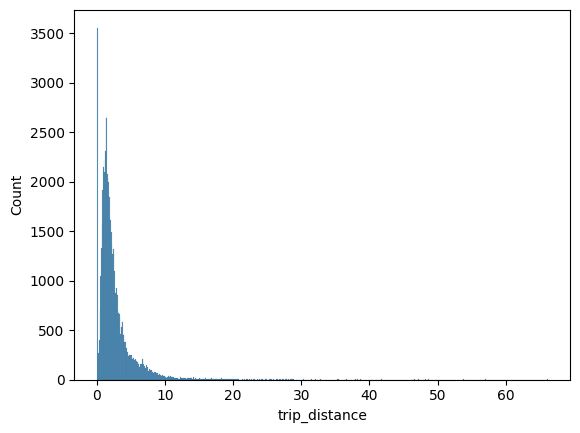

In [ ]:
#Melihat apakah trip_distance berdistribusi normal
sns.histplot(nyc_opr2['trip_distance'])
plt.show()

Dari histogram diatas terlihat ada data outlier, jika data outlier dihapus untuk analisa ini, maka data cenderung skewness kanan yang artinya nilai rata-rata lebih besar daripada nilai median, maka selanjutnya akan kami pastikan dengan uji kenormalan data menggunakan metode uji statistik kstest, shapiro dan liliefors.

H0 = Data Berdistribusi Normal

H1 = Data tidak berdistribusi Normal

In [ ]:
from scipy.stats import kstest, shapiro
kstest(nyc_opr2['trip_distance'], 'norm')

KstestResult(statistic=0.6406323818402153, pvalue=0.0, statistic_location=0.8, statistic_sign=-1)

In [ ]:
from statsmodels.stats.diagnostic import lilliefors
lilliefors(nyc_opr2['trip_distance'])

(0.180968257044678, 0.0009999999999998899)

In [ ]:
shapiro(nyc_opr2['trip_distance'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.6888805627822876, pvalue=0.0)

- Uji Statistik KSTest mendapatkan P-Value 0.0
- Uji Statistik Liliefors mendapatkan P-Value 0.000999
- Uji Statistik Shapiro mendapatkan P-Value 0.0

Dari ketiga uji diata didapatka P-Value < 0.05, Maka Kesimpulan yang diperoleh adalah Tolak H0 yang berarti data tidak berdistribusi normal.

Karena data `trip_distance` tidak berdistribusi normal, maka untuk mencari rata-rata nilainya kami menggunakan nilai tengah atau median.

In [ ]:
#Rata-rata jarak tempuh per transaksi perjalanan (mil)
dist_mean = nyc_opr2['trip_distance'].median()
dist_mean

1.8

In [ ]:
#Biaya bahan bakar yang dibutuhkan per transaksi perjalanan ($)
nyc_opr2['bahan_bakar'] = (nyc_opr2['trip_distance'] / 20) * 3.588

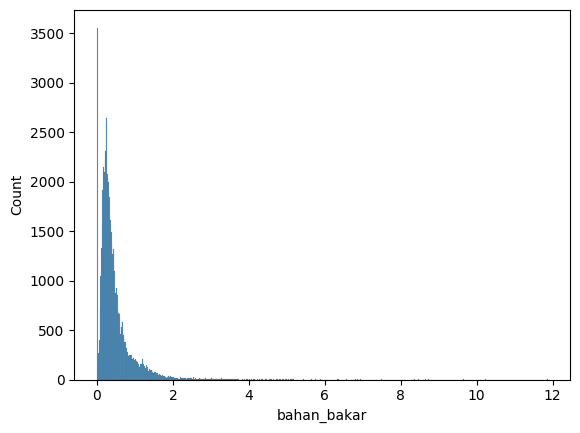

In [ ]:
#Melihat apakah trip_distance berdistribusi normal
sns.histplot(nyc_opr2['bahan_bakar'])
plt.show()

Atribut biaya bahan bakar yang kami buat adalah atribut yang dipengaruhi oleh trip_distance, sehingga menghasilkan distribusi data yang mirip dengan trip_distance, maka untuk mencari rata-rata kami menggunakan nilai tengah atau median.

In [ ]:
#Rata-rata biaya bahan bakar yang dibutuhkan per transaksi perjalanan ($)
nyc_opr2['bahan_bakar'].median()

0.32292

>Rata-rata atau nilai tengah biaya bahan bakar yang digunakan per perjalanan adalah sebesar `$ 0.32` dengan rata-rata atau nilai tengah jarak per perjalanan adalah sebesar `1.8 mil`

### 2.3. Berapa rata-rata dalam satuan gallon bahan bakar yang digunakan per hari

In [ ]:
# Melihat rata2 jarak perjanan per hari
dist_mean2 = nyc_opr2.groupby([nyc['lpep_pickup_datetime'].dt.to_period("D")])[['trip_distance', 'bahan_bakar']].mean()

In [ ]:
dist_mean2

,trip_distance,bahan_bakar
lpep_pickup_datetime,,
2023-01-01,2.909138,0.521899
2023-01-02,2.736047,0.490847
2023-01-03,2.462786,0.441824
2023-01-04,2.391732,0.429077
2023-01-05,2.661087,0.477399
2023-01-06,2.479276,0.444782
2023-01-07,2.628073,0.471476
2023-01-08,2.582121,0.463233
2023-01-09,2.497781,0.448102


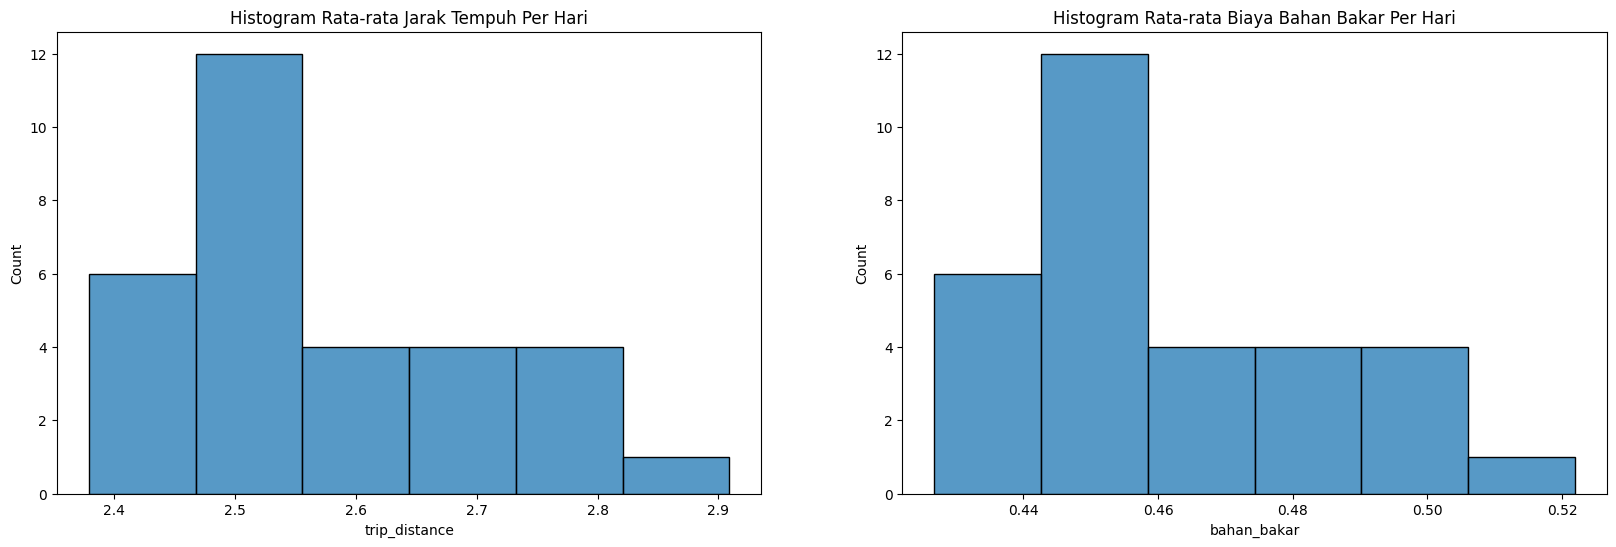

In [ ]:
#Melihat apakah trip_distance per hari berdistribusi normal
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.histplot(dist_mean2['trip_distance'])
plt.title('Histogram Rata-rata Jarak Tempuh Per Hari')

plt.subplot(1,2,2)
sns.histplot(dist_mean2['bahan_bakar'])
plt.title('Histogram Rata-rata Biaya Bahan Bakar Per Hari')
plt.show()

In [ ]:
#Median jarak perjanan per hari
dist_mean2.median()

trip_distance    2.514534
bahan_bakar      0.451107
dtype: float64

>Rata-rata atau nilai tengah biaya bahan bakar yang digunakan per hari adalah sebesar `$ 0.45` dengan rata-rata atau nilai tengah jarak per hari adalah sebesar `2.5 mil`

### 2.4. Berapa pendapatan bersih per hari per pengemudi

Diketahui biaya operasional pengemudi adalah
- Biaya Lisensi
- Bahan Bakar
- Biaya Layanan `improvement_surcharge`
- Pajak `mta_tax`
- Biaya toll `tolls_amount`

In [ ]:
nyc_opr2['pendapatan_bersih'] = nyc_opr2['total_amount_1'] - (nyc_opr2['bahan_bakar'] + nyc_opr2['improvement_surcharge'] + nyc_opr2['mta_tax'] + nyc_opr2['tolls_amount'])

In [ ]:
nyc_opr2['pendapatan_bersih']

0        24.967148
1        14.015286
2        10.140000
3         7.466780
4         5.302660
           ...    
63828    16.506650
63829    17.262264
63830    12.408840
63831    23.306882
63832    16.320634
Name: pendapatan_bersih, Length: 63832, dtype: float64

In [ ]:
# Pendapatan bersih setelah dikuringi lisensi, jika dihitung harian
pend_bersih1 = (nyc_opr2.groupby([nyc['lpep_pickup_datetime'].dt.to_period("D")])[['pendapatan_bersih']].sum()) - 0.49

In [ ]:
pend_bersih1

,pendapatan_bersih
lpep_pickup_datetime,
2023-01-01,27387.135636
2023-01-02,28053.982060
2023-01-03,38020.246868
2023-01-04,42418.774918
2023-01-05,45244.439284
2023-01-06,46225.545770
2023-01-07,39178.699984
2023-01-08,29387.594958
2023-01-09,42155.033092


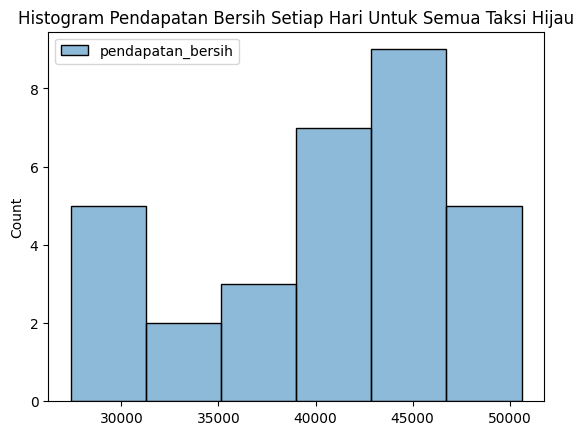

In [ ]:
sns.histplot(pend_bersih1)
plt.title('Histogram Pendapatan Bersih Setiap Hari Untuk Semua Taksi Hijau')
plt.show()

Berdasarkan histogram diatas terlihat bahwa data pendapatan bersih skewness kiri yang artinya nilai rata-rata lebih kecil daripada nilai median, Maka untuk mendapatkan nilai central kami menggunakan median.

In [ ]:
pend_bersih1.median()

pendapatan_bersih    42418.774918
dtype: float64

>Pendapatan bersih semua perjalanan taksi hijau per hari adalah sebesar `$42418.77`

Mengingat jumlah pengemudi taksi hijau per Januari 2023 sebanyak `960 orang`, maka perkiraan pendapatan bersih yang diterima pengemudi adalah

In [ ]:
# Pendapatan bersih per pengemudi per hari
(pend_bersih1 / 960).mean()

pendapatan_bersih    42.468507
dtype: float64

>Pengemudi mendapatkan penghasilan bersih dari taksi hijau rata-rata sebesar `$42,46` setiap harinya

## 3. Kepuasan penumpang terhadap pengemudi ditinjau dari tip yang diberikan

1. Berapa persen dari transaksi yang memberikan tip
2. Berapa persen dari transaksi yang memberikan tip saat keadaan macet
3. Perjalanan dengan lokasi pejemputan dan pemberhentian berdasarkan pemberian tip terbanyak.

### 3.1. Persentase Pengemudi mendapat tip dari transaksi perjalanan.

In [ ]:
# Total tip yang didapat oleh semua pengemudi selama bulan Januari 2023
nyc['tip_amount'].sum()

130422.80000000002

In [ ]:
# Banyaknnya transaksi perjalanan yang memberikan tip
nyc[nyc['tip_amount'] > 0]['tip_amount'].count()

35558

In [ ]:
nyc['tip_amount'].describe()

count    63833.000000
mean         2.043188
std          2.998883
min          0.000000
25%          0.000000
50%          1.410000
75%          3.220000
max        222.220000
Name: tip_amount, dtype: float64

In [ ]:
# Persentase pengemudi mendapat tip dari perjalanan
nyc[nyc['tip_amount'] > 0 ]['tip_amount'].count() / nyc['tip_amount'].count() * 100

55.704729528613726

>
> - Dari data Januari 2023 yang kami dapatkan, persentase pengemudi mendapatkan tip dari penumpang sebesar `55.70%` atau 35558 transaksi perjalanan.
- Total tip yang didapat selama bulan Januari 2023 adalah sebesar `$130422.8`
- Rentang tip yang diperoleh adalah sekitar `$0` sampai `$222.22`
- Dari 25% transaksi perjalanan memilih tidak memberikan tip kepada pengemudi

### 3.2. Persentase Pengemudi mendapat tip dari transaksi perjalanan saat kondisi macet.

In [ ]:
# Banyak perjalanan yang mengalami macet
nyc[nyc['congestion_surcharge'] > 0]['tip_amount'].count()

16890

In [ ]:
# Persentase perjalanan mengalami macet
nyc[nyc['congestion_surcharge'] > 0]['tip_amount'].count() / nyc['tip_amount'].count() * 100

26.459668196700765

In [ ]:
# Persentase pengemudi mendapatkan tip saat perjalanan mengalami macet
nyc[(nyc['congestion_surcharge'] > 0) & (nyc['tip_amount'] > 0)]['tip_amount'].count() / nyc['tip_amount'].count() * 100

20.57869753889054

> - Ada `16890` transaksi perjalanan mengalami macet, yang berarti `26.45%` dari keseluruhan data perjalanan mengalami macet.
- Dari `16890` transaksi perjalanan yang mengalami macet ini, hanya sekitar `20.57%` penumpang yang rela memberikan tip.

### 3.3. Top 5 perjalanan dengan berdasarkan tip

In [ ]:
# Top 5 perjalanan dengan total pemberian tip terbanyak selama Januari 2023
nyc.groupby(by=['PU_Zone','DO_Zone'])[['tip_amount']].sum().sort_values(by='tip_amount', ascending=False).head().reset_index()

,PU_Zone,DO_Zone,tip_amount
0,East Harlem North,Upper East Side North,3100.69
1,East Harlem North,East Harlem South,3023.08
2,East Harlem North,Upper West Side North,2126.47
3,East Harlem North,Yorkville West,1927.45
4,East Harlem North,Morningside Heights,1841.52


In [ ]:
# Jumlah transaksi pada lokasi dengan total pemberian tip terbanyak
nyc[(nyc['PU_Zone'] == 'East Harlem North') & (nyc['DO_Zone'] == 'Upper East Side North')]['tip_amount'].count()

1166

In [ ]:
# Top 5 perjalanan dengan nilai tengah pemberian tip terbanyak selama Januari 2023
nyc.groupby(by=['PU_Zone','DO_Zone'])[['tip_amount']].mean().sort_values(by='tip_amount', ascending=False).head().reset_index()

,PU_Zone,DO_Zone,tip_amount
0,Jackson Heights,Kensington,79.00
1,Elmhurst,Kensington,72.00
2,Mott Haven/Port Morris,Spuyten Duyvil/Kingsbridge,58.88
3,Rego Park,Penn Station/Madison Sq West,54.00
4,Howard Beach,Howard Beach,40.00


In [ ]:
# Jumlah transaksi pada lokasi dengan total pemberian tip terbanyak
nyc[(nyc['PU_Zone'] == 'Jackson Heights') & (nyc['DO_Zone'] == 'Kensington')]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,payment_type,trip_type,congestion_surcharge,total_amount_1,PU_Borough,PU_Zone,PU_Service_Zone,DO_Borough,DO_Zone,DO_Service_Zone
31648,VeriFone Inc,2023-01-17 03:06:47,2023-01-17 03:24:44,17.95,N,Standard rate,129,133,1.0,13.01,...,Credit card,Street-hail,0.0,130.7,Queens,Jackson Heights,Boro Zone,Brooklyn,Kensington,Boro Zone


In [ ]:
# Top 5 perjalanan dengan pemberian tip tersering selama Januari 2023
nyc.groupby(by=['PU_Zone','DO_Zone'])[['tip_amount']].count().sort_values(by='tip_amount', ascending=False).head().reset_index()

,PU_Zone,DO_Zone,tip_amount
0,East Harlem North,East Harlem South,1970
1,East Harlem South,East Harlem North,1429
2,Forest Hills,Forest Hills,1203
3,East Harlem North,Upper East Side North,1166
4,East Harlem North,Central Harlem,953


In [ ]:
# Total dollar pemberian tip tersering pada lokasi perjalanan
nyc[(nyc['PU_Zone'] == 'East Harlem North') & (nyc['DO_Zone'] == 'East Harlem South')]['tip_amount'].sum()

3023.08

In [ ]:
# Nilai central pemberian tip tersering pada lokasi perjalanan
nyc[(nyc['PU_Zone'] == 'East Harlem North') & (nyc['DO_Zone'] == 'East Harlem South')]['tip_amount'].median()

1.88

> - Total pemberian tip terbanyak adalah pada lokasi penjemputan `East Harlem North` dan lokasi berhenti `Upper East Side North` sebanyak `$3100.69` dengan `1166 kali` selama transaksi Januari 2023.
- Nilai tengah pemberian tip terbanyak adalah pada lokasi penjemputan `Jackson Heights` dan lokasi berhenti `Kensington	` sebanyak `$79`, namun data ini **tidak merepresentasikan** karena hanya terdapat `1 kali` transaksi selama Januari 2023.
- Perjalanan dengan pemberian tip tersering adalah pada lokasi penjemputan `East Harlem North` dan lokasi berhenti `East Harlem South` sebanyak `1970 kali` dengan total tip yang didapat sebesar `$ 3023.08` dan nilai central setiap transaksi sebesar `$1.88` selama Januari 2023.
- Dari ketiga tabel top 5 diatas, lokasi `East Harlem North` adalah dengan penumpang paling sering dalam pemberian tip.

# Kesimpulan

Dari analisis yang telah dilakukan, sebanyak 63.833 data transaksi hijau setelah dilakukan cleaning, dapat kita buat kesimpulan berikut:

**`Permintaan dan Preferensi Penumpang`**

Rata-rata transaksi perjalanan yang didapat perhari oleh pengemudi adalah sebanyak 2 kali, dengan perjalanan paling popular di lokasi East Harlem dan hari selasa menjadi hari yang paling banyak penumpang. Rata-rata total pendapatan yang diperoleh setiap pengemudi taksi hijau pada Januari 2023 adalah \$47,16. Penumpang lebih senang memanggil taksi langsung dijalan, membayar menggunakan kartu kredit dan menggunakan tarif standard dalam perjalanannya.

**`Distribusi Pendapatan Bersih Pengemudi`**

Pendapatan bersih seluruh taksi hijau per hari pada data Januari 2023 setelah diidentifikasi biaya-biaya operasional adalah `$42418.7` per hari. Jumlah pengemudi yang aktif pada saat itu sebanyak 960 orang, maka rata-rata pendapatan bersih per pengemudi adalah `$42,46` per hari

**`Faktor Kepuasan Penumpang`**

Dari setiap perjalanan peluang pengemudi mendapatkan tip adalah sebesar 55.7%, namun ketika perjalanan mengalami macet, peluang pengemudi mendapat tip menurun menjadi 20.57%. Perjalanan yang paling sering memberikan tip kepada pengemudi adalah dari East Harlem North ke East Harlem South. Lokasi East Harlem North merupakan lokasi yang paling popular untuk memberikan tip.

# Rekomendasi

Regulasi pendapatan minumun kota New York adalah`$ 15` per jam atau setara `$ 120` per hari [disini](https://sgp.fas.org/crs/misc/R43792.pdf). Pengemudi taksi hijau hanya mendapat `$42.46` setiap harinya dengan hanya 2 kali panggilan setiap armada per hari, dan setiap panggilan hanya memakan jarak 1.8 mil. Dengan memperhatikan aspek kesejahteraan pengemudi. Jika penerunan pada pengemudi merupakan kebijakan yang dibuat oleh Komisi NYC TLC, maka keputusan tersebut sudah tepat. Namun jika penurunan terjadi begitu saja maka, Komisi NYC TLC bisa mempertimbangkan untuk tidak mengeluarkan lisensi untuk sementara waktu.

Jika ditinjau dari komersial, maka Komisi NYC TLC dapat mempertimbangkan untuk memperhatikan pada opsi pembayaran agar dipastikan sistem pembayaran dengan credit card berfungsi dengan baik dan menambah opsi pembayaran digital lain yang mungkin diminati pelanggan, seperti e-wallet atau aplikasi pembayaran digital lainnya. Kemudian promosi penggunaan aplikasi pemanggilan taksi hijau dapat lebih digalakkan untuk menjangkau kalangan yang lebih luas.